**Welcome** to another Data Science Survey by Kaggle.  I must say that when I was filling up the survey form, I got very excited. The questions were very much focused on different aspects as usual. Although I am expecting things to be in a better state as compared to the previous survey done in 2017, only data speaks the truth! 
 
I am going to analyze each question to the depth it demands. This is going to be a huge notebook with lots of code in it. If you are up for learning something new, sit tight and read thoroughly. Let's deep dive into the results and check what the results have to say!

![yay](http://media.giphy.com/media/3o6fIZP7rywPQyEV44/giphy.gif)

<a id="contents"></a>
# Contents
1. [Import libraries](#imports).
2. [Load the Dataset](#dataloading) <br>
3. [Some handy-dandy fucntions](#customfunctions)<br>
4. Analysis <br>
     4.1 [Gender Diversity](#diversity)<br>
     4.2 [Age group distribution](#age)<br>
     4.3 [Gender distribution in different age groups](#age-gender)<br>
     4.4 [Country-wise distribution](#country)<br>
     4.5 [Country-wise gender distribution](#country-gender)<br>
     4.6 [Formal level of Education](#education)<br>
     4.7 [Current Role](#job-title)<br>
     4.8 [Experience in current role](#experience)<br>
     4.9 [Experience in top roles](#roles-experience)<br>
     4.10 [Yearly Compensation](#salary)<br>
     4.11 [Do businesses really want Machine Learning?](#business)<br>
     4.12 [Programming language preference](#proglang)<br>
     4.13 [Which programming language beginners/aspiring data scientist should learn first?](#advise)<br>
     4.14 [Most used ML libraries](#libraries)<br>
     4.15 [Popular visualization libraries and tools](#vis)<br>
     4.16 [How much data science people code actively?](#coding)<br>
     4.17 [Writing code to do data analysis?](#data-analysis)<br>
     4.18 [How much time people have spent on ML?](#ml_methods_hist)<br>
     4.19 [Do people really think of themselves as data scientist?](#dataScientist)<br>
     4.20 [What types of data do people deal with?](#datasets-type)<br>
     4.21 [Learning platforms](#learningplatform)<br>
     4.22 [Expertise in Data Science](#expertise_DS)<br>
     4.23 [Do people care about bias in datasets/algorithms?](#fairness)<br>
     4.24 [Time spent exploring model insights](#modelinsights)<br>
     4.25 [Are ML models black boxes?](#explainableML)<br>
     4.26 [Which IDE do people prefer for their work?](#ide)<br>
     4.27 [Popular hosted notebooks](#notebooks)<br>
     4.28 [Public Datasets](#datasetsfinder)<br>
     4.29 [Time spent on different stages in a Data Science project](#timespentondiffaspects)<br>
     4.30 [Popular Relational Databases](#databases)<br>
     4.31 [What are all the machine learning products people have used?](#ml_products)<br>
     4.32 [Barriers in reproudcibility](#barriersreprod)<br>
     4.33 [Conclusion](#conclusion)<br>

<a id='Imports'></a>
### 1. Import the required libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import re
import math
import glob
import itertools
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
init_notebook_mode(connected=True)
print(os.listdir("./input"))

['freeFormResponses.csv', 'multipleChoiceResponses.csv', 'SurveySchema.csv']


In [3]:
# For plotting within the notebook
%matplotlib inline

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

color = sns.color_palette()

# For REPRODUCIBILITY
seed = 111
np.random.seed(seed)

<a id="dataloading"></a>
## 2. Load the dataset

In [4]:
# Define input path
input_dir = Path('./input/')

# Read the csvs
survey_schema = pd.read_csv(input_dir/ 'SurveySchema.csv')
freeFormResp = pd.read_csv(input_dir/ 'freeFormResponses.csv')
multiChoiceResp = pd.read_csv(input_dir/'multipleChoiceResponses.csv')

In [5]:
print(f"Total number of responses: {len(multiChoiceResp)}")

Total number of responses: 23860


Sneak peek at the data 

In [6]:
# Check the schema first
survey_schema.head()

,2018 Kaggle Machine Learning and Data Science Survey,Q1,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,...,Q47,Q48,Q49,Q5,Q50,Q6,Q7,Q8,Q9,Time from Start to Finish (seconds)
0,Question:,What is your gender? - Selected Choice,Does your current employer incorporate machine...,Select any activities that make up an importan...,What is the primary tool that you use at work ...,Which of the following integrated development ...,Which of the following hosted notebooks have y...,Which of the following cloud computing service...,What programming languages do you use on a reg...,What specific programming language do you use ...,...,What methods do you prefer for explaining and/...,"Do you consider ML models to be ""black boxes"" ...",What tools and methods do you use to make your...,Which best describes your undergraduate major?...,What barriers prevent you from making your wor...,Select the title most similar to your current ...,In what industry is your current employer/cont...,How many years of experience do you have in yo...,What is your current yearly compensation (appr...,Duration (in seconds)
1,# of Respondents:,23860,20670,19518,19199,19117,18971,18864,18828,15223,...,13418,13369,12891,22948,12814,22901,21686,21102,20186,23860
2,Who was excluded? (0 = not excluded; 1 = exclu...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,If What is your age (# years)? 0-17 Is Selecte...,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
4,If What is the highest level of formal educati...,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [7]:
multiChoiceResp.head()

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
0,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,Select the title most similar to your current ...,In what industry is your current employer/cont...,...,What tools and methods do you use to make your...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,-1,NaN,NaN,Requires too much technical knowledge,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1


<a id="customfunctions"></a>
### 3. Some handy-dandy functions 
 In this notebook, I will demonstrate:<br>
**1)** How to visualize things in the most simple way?<br>
**2)** How can you tweak the plots to put more information in a way you want? (This is an interesting hack.)<br>
**3)** How can you do same thing in a better way?<br>
**4)** How to write clean and optimized code?<br>

For example, for one question I will show that how can you make a simple bar chart. In the next question, I will demonstrate how to the percentage of bar charts in seaborn. In the next question, I will show how can you achieve the same thing with interactive visualization libraries. **Pay attention to the code if you are up for learning hundreds of new things today**

Let us define some custom functions that can be used later.

In [8]:
# A handy dandy function for making a bar plot. You can make it as flexible as much as you want!!
def do_barplot(df, 
               figsize=(20,8), 
               plt_title=None, 
               xlabel=None, 
               ylabel=None, 
               title_fontsize=20, 
               fontsize=16, 
               orient='v', 
               clr_code=None, 
               max_counts=None,
               print_pct=True,
               normalize=False,
               rotation=None):
    """
    This function can be used to make a barplot from a pandas dataframe very quickly. It counts the number of instances
    per category and plot all the values on a barchart. The barchart can be made to represent count or in terms of 
    percentages. 
    
    Arguments:
    df: pandas dataframe used for this plot
    figsize: size of the plot
    plt_title: title of the plot
    xlabel: label on X-axis
    ylabel: label on Y-axis
    title_fontsize = fontsize for title
    fontsize: fontsize for x and y labels
    orient: orientation of the plot 'h' or 'v'
    clr_code: color code for seaborn color paelette
    max_counts: limit the number of labels to de displayed
    print_pct: whether to print the count values for each category
    normalize: whether to print percentage instead of raw counts
    rotation: rotation value for ticks
    
    """
    
    # Get the value counts 
    if normalize:
        df_counts = round(df.value_counts(normalize=normalize)*100,2)
    else:
        df_counts = df.value_counts()
        
    total = df.shape[0]
    
    # If there are too many values, limit the amount of information for display purpose
    if max_counts:
        df_counts = df_counts[:max_counts]
    
    # Print the values along with their counts and overall %age
    if print_pct and not normalize:
        for i, idx in enumerate(df_counts.index):
            val = df_counts.values[i]
            percentage = round((val/total)*100, 2)
            print(f"{str(idx).ljust(25)}  {val} or roughly {percentage}%")
    
    # Plot the results 
    plt.figure(figsize=figsize)
    
    if clr_code is None:
        clr_code = np.random.randint(6)

    if orient=='h':
        sns.barplot(y=df_counts.index, x=df_counts.values, orient='h', color=color[clr_code])
    else:
        sns.barplot(x=df_counts.index, y=df_counts.values, orient='v', color=color[clr_code])
            
    plt.title(plt_title, fontsize=title_fontsize)
    plt.ylabel(ylabel, fontsize=fontsize)
    plt.xlabel(xlabel, fontsize=fontsize)
    
    if orient=='h':
        plt.yticks(range(len(df_counts.index)), df_counts.index)
    else:
        plt.xticks(range(len(df_counts.index)), df_counts.index, rotation=rotation)
    plt.show()
    del df_counts

In [9]:
def pct_on_bars(axs, df, offset=50, orientation='v', adjustment=2, pos='center', prec=1, fontsize=10):
    """
    This function can be used to plot percentage on each bar in a barplot. The function assumes
    that for each value on an axis, there is only one corresponding bar. So, if you have plotted something with
    hue, then you should consider using something else
    
    Arguments:
    axs: Matplotlib axis
    df: pandas dataframe used for this plot
    offset: Relative position of the text w.r.t the bar
    orientation: 'h' or 'v'
    adjustment: If the text overflows the bar on either side, you can adjust it by passing some value
    prec: How much precision is to be used for displaying percentage?
    fontsize: size of the font used in percentage text
    
    """
    
    # Get all the bars
    bars = axs.patches
    
    # Size of dataframe
    items = len(df)
    
    assert round(prec)>-1, "Precision value passed is wrong "
    
    # Iterate over each bar and plot the percentage
    for bar in bars:
        width = bar.get_width()
        height = bar.get_height()
        precision = '{0:.' + str(prec) + '%}'
        
        if math.isnan(width):
            width=0
        if math.isnan(height):
            height=0
        
        # Check orientation of the bars
        if orientation=='h':
            val_to_sub = height/adjustment
            axs.text(width + offset, bar.get_y()+bar.get_height()-val_to_sub, 
                    precision.format(width/items), ha=pos, fontsize=fontsize)
        
        elif orientation=='v':
            val_to_sub = width/adjustment
            axs.text(bar.get_x()+width-val_to_sub, height + offset, 
            precision.format(height/items), ha=pos, fontsize=fontsize)
        
        else:
            print("The orientation value you passed is wrong. It can either be horizontal 'h' or vertical 'v'")

In [10]:
def pct_on_stacked_bars(axs, values, orientation='v', pos='center', prec=0, fontsize=10, adjustment=0.05):
    """
    This function can be used to plot percentage on each bar in a stacked barplot. 
    
    Arguments:
    axs: Matplotlib axis
    values: percentage values corresponding to each rectangle in a stacked plot
    offset: Relative position of the text w.r.t the bar
    orientation: 'h' or 'v'
    prec: How much precision is to be used for displaying percentage?
    fontsize: size of the font used in percentage text
    adjustment: decimal value in case the values flow out of the rectange
    
    """
    
    # Get all the bars
    bars = axs.patches
    
    
    # Get all the percentages
    assert round(prec)>-1, "Precision value passed is wrong "
    values = np.round(values, decimals=prec).T.flatten()
    
    if adjustment is not None:
        adjustment=0.05
    
    # Iterate over each bar and plot the percentage
    for i, bar in enumerate(bars):
        width = bar.get_width()
        height = bar.get_height()
        x = bar.get_x()
        y = bar.get_y()
        label = str(values[i]) + "%"
        
        if math.isnan(width):
            width=0
        if math.isnan(height):
            height=0
        
        axs.text(x+width/2+adjustment, y+height/2+adjustment, label, ha=pos, fontsize=fontsize) 

In [11]:
def get_traces(df, 
                freq_df, 
                text=True, 
                textposition='auto', 
                opacity=0.5, 
                orientation='v', 
                prec=0,
                stacked=False):
    """
    This function can be used to generate the traces for a plotly plot. 
    
    Arguments:
    df: unstacked value_counts of a grouped pandas dataframe
    freq_df: similar to freq_df but contains percentages
    text: Whether to put text on bar or not
    textposition: Where to put the text. Look for plotly docs for more info
    opacity: opacity in the bars
    orientation: horizontal or vertical bars
    prec: how much precision to be considered for displaying text
    stacked: whether the traces are for stacked plots or not
    
    """
    
    # An empty list to collect traces for plotly
    data = []

    # Iterate for each group in df
    for i, j in zip(range(freq_df.shape[0]), range(freq_df.shape[1])):
        x = df.index
        if stacked:
            y = freq_df.values[:,j]
        else:
            y = df.values[:,j]
        z = freq_df.values[:,j]
        
        if orientation=='v': 
            # define a trace for the current index
            trace = go.Bar(
            x=x,
            y=y,
            text=[str(np.round(i, decimals=prec)) + "%" for i in z],
            textposition = textposition,
            opacity=opacity,
            orientation='v',
            name = df.columns[j])
        
        elif orientation=='h':
            # define a trace for the current index
            trace = go.Bar(
            y=x,
            x=y,
            text=[str(np.round(i, decimals=prec)) + "%" for i in z],
            textposition = textposition,
            opacity=opacity,
            orientation='h',
            name = df.columns[j])
        
        else:
            print("Wrong orientation value provided")
            return
        
        # add it to the list
        data.append(trace)
    return data

In [12]:
# A handy-dany function for plottinf funnel charts
def draw_funnel_chart(values, 
                      phases, 
                      colors=None, 
                      plot_width=400,
                      section_h=100,
                      section_d=10):
    """
    A function that can be used to generate funnel charts in plotly.
    
    """
    n_phase = len(phases)
    plot_width = plot_width

    # height of a section and difference between sections 
    section_h = section_h
    section_d = section_d

    # Check if the color values are given or not
    if colors is None:
        colors = ['rgb' + str(tuple(np.random.randint(255, size=(3)))) for i in range(n_phase)]
    elif len(colors)!=n_phase:
        assert len(colors)==n_phase, "Number of color values didn't match the number of values"
    else:
        colors = colors

    # multiplication factor to calculate the width of other sections
    unit_width = plot_width / max(values)

    # width of each funnel section relative to the plot width
    phase_w = [int(value * unit_width) for value in values]

    # plot height based on the number of sections and the gap in between them
    height = section_h * n_phase + section_d * (n_phase - 1)

    # list containing all the plot shapes
    shapes = []

    # list containing the Y-axis location for each section's name and value text
    label_y = []

    for i in range(n_phase):
            if (i == n_phase-1):
                    points = [phase_w[i] / 2, height, phase_w[i] / 2, height - section_h]
            else:
                    points = [phase_w[i] / 2, height, phase_w[i+1] / 2, height - section_h]

            path = 'M {0} {1} L {2} {3} L -{2} {3} L -{0} {1} Z'.format(*points)

            shape = {
                    'type': 'path',
                    'path': path,
                    'fillcolor': colors[i],
                    'line': {
                        'width': 1,
                        'color': colors[i]
                    }
            }
            shapes.append(shape)

            # Y-axis location for this section's details (text)
            label_y.append(height - (section_h / 2))

            height = height - (section_h + section_d)

    # For phase names
    label_trace = go.Scatter(
        x=[-100]*n_phase,
        y=label_y,
        mode='text',
        hoverinfo='text',
        text=phases,
        textfont=dict(
            color='rgb(200,200,200)',
            size=12
        )
    )

    # For phase values
    value_trace = go.Scatter(
        x=[70]*n_phase,
        y=label_y,
        mode='text',
        hoverinfo='text',
        text=values,
        textfont=dict(
            color='rgb(200,200,200)',
            size=12
        )
    )
    
    return label_trace, value_trace, shapes

# 4. Analysis

<a id="diversity"></a>
## 4.1 Gender Diversity: 
Q1: What is your gender? 

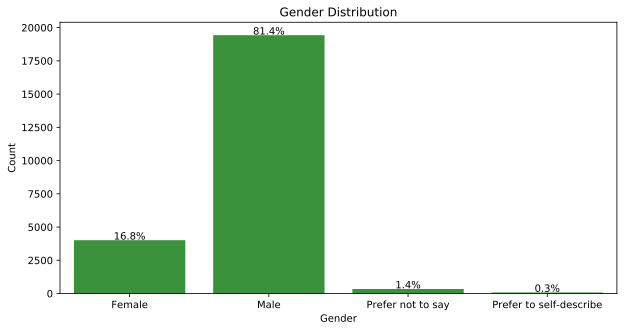

In [13]:
# Select the column Q1 "What is your geneder?"
gender_df = multiChoiceResp['Q1'][1:].dropna()

f,ax=plt.subplots(figsize=(10,5))

# Do countplot 
ax=sns.countplot(gender_df, orient='v', color=color[2])

# Plot percentage on the bars
pct_on_bars(ax, gender_df, orientation='v', offset=50,adjustment=2)

    
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

**This is disastrous** I even did the analysis for [Kaggle Survey 2017](https://www.kaggle.com/aakashnain/the-world-of-stackoverflow) and I don't know why has the numbers not changed at all! I am literally in shock. Here is the comparison:

| Gender       | 2017           | 2018  |
| :-------------|:-------------|: -----|
| Male           | 81.88%        | 81.44%|
| Female       | 16.71%          | 16.81%|
| Others        | <2%            |  <2%  |

You might argue that the comparison is not completely fair as the number of respondents is not equal in both the cases. The numbers have grown from 2017 but the ratio is still almost the same. To give a fair comparison and how the numbers have grown since 2017, take a look at the table below:

| Gender       | 2017          | 2018  |Change(%)|
| :-------------|:-------------|: -----|---------|
| Male           |~14K         |~20K   | ~43%    |
| Female         |~2.8K        |~4K    | ~43%    |

Hence the overall ratio is almost the same. It is good that the numbers in the case of females have increased but it is not enough. 

**To the World**: We need to do more. We can't remove `bias` just by saying, a collective effort is required. Because of these things, many things are Data Science and Machine Learning are biased.  

[(Click here to go to the contents section at the top)](#contents)

<a id="age"></a>
## 4.2 Age

Q2: What is your age in years?

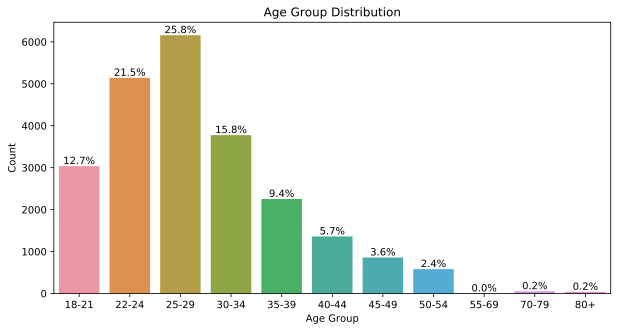

In [14]:
# Select the column for the corresponding question
age_df = multiChoiceResp['Q2'][1:].dropna()
order= ['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-69', '70-79', '80+']

f,ax=plt.subplots(figsize=(10,5))

# Do countplot 
ax=sns.countplot(age_df,order=order, orient='v')

# plot the percentage on bars
pct_on_bars(ax, age_df, orientation='v', offset=50, adjustment=2)

    
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Group Distribution')
plt.show()

More than **70%** of the respondents are of the age group 18-34. Given the hype around Data Science, where every other person declares it as the  **sexiest job of the 21st-century**, I don't find this odd. 

Although this is a very good sign that adoption of Data Science has become huge but there is some bad news also. Many people portray data science and machine learning as `easy` but that is very very misleading if you consider all the things that it takes to become a very good Data Scientist/ML engineer. In short, Pandas isn't Data Science, scikit-learn isn't machine learning and Tensorflow/PyTorch isn't deep learning. People start with great enthusiasm but when they deep dive into the subject they feel overwhelmed. In my opinion, if anyone can't give the right guidance, he/she shouldn't provide the wrong insights as well.

[(Click here to go to the contents section at the top)](#contents)

<a id="age-gender"></a>
## 4.3 Gender distribution in different age groups

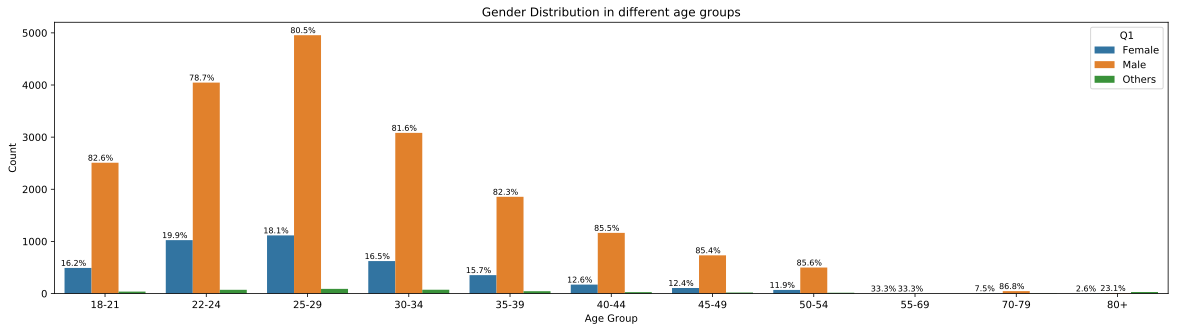

In [15]:
# Do countplot on age df
age_df = multiChoiceResp[['Q1', 'Q2']][1:].dropna()

# We will consider only three categries for brevity: Female, Male and Others. This isn't done to hurt someone
# I am really sorry if I did hurt someone by doing this.
age_df['Q1'] = age_df['Q1'].replace(['Prefer not to say', 'Prefer to self-describe'], 'Others')

f,ax = plt.subplots(figsize=(20,5))
ax=sns.countplot(x='Q2', data=age_df, order=order, orient='v', hue='Q1')

# Get all the bars and plot the percentage also
bars = ax.patches

sections = len(bars)//3
first_bar = bars[:sections]
second_bar = bars[sections:len(first_bar)+sections]
third_bar = bars[len(second_bar)+sections:]


# Loop over the bars and put text on each bar
for left, middle, right in zip(first_bar, second_bar, third_bar):
        height_l = left.get_height()
        height_m = middle.get_height()
        height_r = right.get_height()
    
        
        if math.isnan(height_l):
            height_l=0.0001
        if math.isnan(height_m):
            height_m=0.0001
        if math.isnan(height_r):
            height_r=0.0001
        
        total = height_l + height_m + height_r

        ax.text(left.get_x() + left.get_width()/3., height_l + 40, '{0:.1%}'.format(height_l/total), ha="center", fontsize=8)
        ax.text(middle.get_x() + middle.get_width()/3., height_m + 40, '{0:.1%}'.format(height_m/total), ha="center",fontsize=8)


    
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Gender Distribution in different age groups')
plt.show()

Is this the result you expected? I know we all thought that the distribution would be highly skewed for the age groups beyond 25 and that is because of all the circumstances that were present in the last decade. But none of us would have expected that the diversity problem would be so much screwed in the youngest age group, given the facts that everyone is trying to tackle the gender bias problem. *The age group `18-21` has a much worse gender distribution as compared to the age group `25-28`* :(

[(Click here to go to the contents section at the top)](#contents)

<a id="country"></a>
## 4.4 Country of Residence

Q3: In which country do you currently reside?

**First thing first**: A lot of people have shown in kernels how easy it is to plot things on a world map in languages other than Python. I assume Python people are curious to do the same. So, I am going to show how easy it is to plot things on World Map in Python too. Take a look!

In [16]:
# Select the column for the corresponding question
country_df = multiChoiceResp['Q3'][1:].dropna()

# Drop columns where the country is mentioned as 'others' or where the respondent declined to share the name of the country
index_to_drop = country_df.index[(country_df=='Other') | (country_df=='I do not wish to disclose my location')]
country_df = country_df.drop(index_to_drop)

# Get the counts for each country
country_value_counts = country_df.value_counts()

# Define data for plotly interactive plot
data = [dict(
        type = 'choropleth',
        autocolorscale = True,
        showscale = True,
        locations = country_value_counts.index,
        z = country_value_counts.values,
        locationmode = 'country names',
        reversescale = False,
        marker = dict(
            line = dict(color = 'rgb(180,180,180)',width = 0.5) 
            ),
        colorbar = dict(
            title = "Count"),
            autotick = False,    
        )]

# Layout of th plot
layout = dict(
    title = 'Where do data science people live?',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(type = 'Mercator')
        ),
    autosize=False,
    width=1000,
    height=600,
    )

# Plot
fig = dict( data=data, layout=layout )
iplot( fig, validate=False, show_link=False)

You can hover over each country to check the number of data science people who participated in the Kaggle Data Science Survey 2018 from that corresponding country. 

This is all good for a fancy visualization. But what about the top 10 countries and how things have changed among the top 10 players since 2017? Let's check that! 

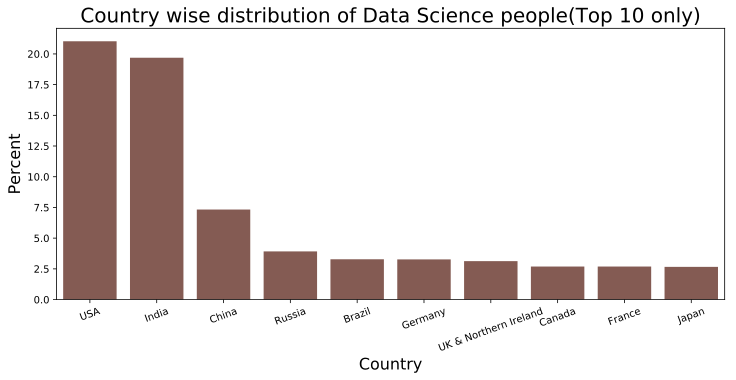

In [17]:
# Select the column for the corresponding question
country_df = multiChoiceResp['Q3'][1:].dropna()

# Drop columns where the country is mentioned as 'others' or where the respondent declined to share the name of the country
index_to_drop = country_df.index[(country_df=='Other') | (country_df=='I do not wish to disclose my location')]
country_df = country_df.drop(index_to_drop)
country_df = country_df.replace(['United States of America', 'United Kingdom of Great Britain and Northern Ireland'], ['USA', 'UK & Northern Ireland'])

# Check the counts and plot the values
# We will only consider top 10 counries only
do_barplot(country_df, plt_title='Country wise distribution of Data Science people(Top 10 only)', 
           xlabel='Country', ylabel='Percent', 
           figsize=(12,5), orient='v',
           max_counts=10,
           clr_code=5, 
           normalize=True, 
           rotation=20)

2018 is almost the same as 2017 with USA and India as the top two leading countries. Almost 40% of the respondents are from USA and India. Also, there are some changes as compared to 2017. Let's see how much things have changed in the top 10 since 2017:

| 2018           | 2017|
|:-------------|:-------------:|
|1.  USA        |  USA          |
|2.  India      |  India          | 
|3. **China**  |  Russia      |
|4.  Russia     |  UK          |
|5.**Brazil** |  China          | 
|6.**Germany**|  Brazil      |
|7.  UK         |  Germany          |
|8.  France     |  France          | 
|9.  Canada     |  Canada     |
|10**Japan** |  Australia     |

So Australia has been replaced by Japan in 2018 in the top 10 list whereas China jumped from 5th position to 3rd position. Brazil and Germany also got a jump of one position.

[(Click here to go to the contents section at the top)](#contents)

<a id="country-gender"></a>
## 4.5 Country-wise gender distribution

We have already seen that the gender distribution is highly skewed. It would be interesting to check how this distribution varies in the top 10 countries.

In [18]:
# Select the columns you are insterested in
df = multiChoiceResp[['Q1', 'Q3']].dropna()

# Select only those indices where the top 10 countries are there
df = df.iloc[country_df.index]

# Select countries to consider
top10_countries = ['United States of America', 'United Kingdom of Great Britain and Northern Ireland', 
                   'India', 'China', 'Russia','Brazil', 'Germany', 'France', 'Canada', 'Japan']

df = df[df['Q3'].isin(top10_countries)]
df['Q3'] = df['Q3'].replace(['United States of America', 'United Kingdom of Great Britain and Northern Ireland'], 
                            ['USA', 'UK & Northern Ireland'])
df['Q1'] = df['Q1'].replace(['Prefer not to say', 'Prefer to self-describe'], 'Others')


# Group by roles and get the count for experience 
freq_df = df.groupby(['Q3'])['Q1'].value_counts().unstack()

# Convert the frequencies to percentage
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100

# Get traces
data = get_traces(freq_df, pct_df, stacked=True, orientation='v', textposition='auto', opacity=0.9)

# Define the layout for plotly figure
layout = go.Layout(
     autosize=False,
     width=900,
     height=600,
     barmode='stack',   
     margin=go.layout.Margin(
                            l=50,
                            r=0,
                            b=100,
                            t=50,),
    title='Country-wise gender distribution',
    xaxis=dict(title='Country'),
    yaxis=dict(title='Percentage'),
)

# Visualize
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

Very interesting!
* **Japan**, even after making so many technical advancements, has the worst gender bias. Totally unbelievable!
* **Brazil** is almost on the same scale as Japan.
* **USA** and **Canada** are much better than any other country but that's relative but I am positive that these countries will lead others in terms of removing gender bias in the nearby future. **UK and Nothern Ireland** is almost catching up with Canada.
* **France, Germany**, and **India** are almost on a similar scale, every one of them having less than 20% of the female workforce in data science
* **Russia** is ahead of Japan in gender diversity in data science but still way too behind than **USA** and **Canada**

[(Click here to go to the contents section at the top)](#contents)

<a id="education"></a>
## 4.6 Level of Education

Q4. What is the highest level of formal education that you have attained or plan to attain within the next 2 years?

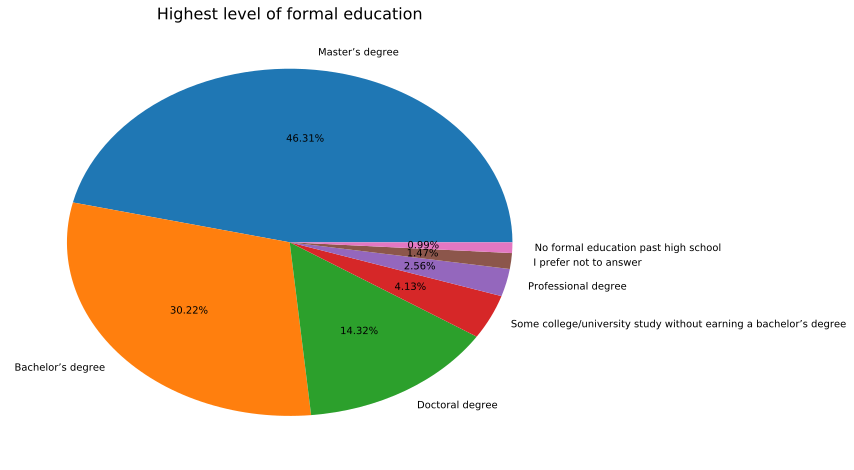

In [19]:
# Select the column corresponding to Q4, the education level
edu_df = multiChoiceResp['Q4'][1:].dropna()

# Get the value counts
edu_df_counts = edu_df.value_counts()

# Get the labels and the corresponding counts 
counts = edu_df_counts.values
labels = edu_df_counts.index


# Function to show percentage in pie plot
def show_autopct(values):
    def my_autopct(pct):
        total = len(edu_df)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%'.format(p=pct)
    return my_autopct


# Plot a pie chart showing level of formal education
plt.figure(figsize=(10,8))
patches, text, autotext = plt.pie(counts, labels=labels, autopct=show_autopct(counts), )
plt.title("Highest level of formal education", fontsize=16)
plt.show()

# Delete variables that aren't going to be used further in order to save memory
del counts,labels, patches, text, autotext, edu_df_counts

Almost 50% of the respondents are having Master's degree while 30% of them are having a Bachelor's degree. In the 2017 survey, I predicted that the percentage of `Bachelor's degree` will increase while that of `Master's degree` will decrease because of the on-going political situations as well as the huge demand of DS people in the market.

**My predictions went completely wrong** There is a whopping increased interest in getting a  `Master's degree`. Is this because of the fact that most of the data science jobs, especially including Machine learning, put a minimum of Master's degree in requirements? Maybe or maybe not. 

Anywyas, let's see how things have changed overall since 2017:

| Degree                             | 2018(%)  | 2017(%)   |
|:-------------|-------------:|---------------:|
|Master's                            |46        |41         |  
|Bachelor's                          |30        |32         |  
|Doctoral                            |14        |15         |
|Professional                        |3         |3          |
|College/Univ without earnings       |4         |5          |
|No formal edu past high school      |~1.5      |~2         |

[(Click here to go to the contents section at the top)](#contents)

<a id="job-title"></a>
## 4.7 Current Role

Q6: Select the title most similar to your current role (or most recent title if retired)

In [20]:
# Select column Q6
role_df = multiChoiceResp['Q6'][1:].dropna()

# Get the value counts
role_df_counts = role_df.value_counts()

# Perecntage values
role_df_pct = (round(role_df.value_counts(normalize=True)*100,1)).values
role_df_pct = [str(x)+'%' for x in role_df_pct]

# Visualize
trace0 = go.Bar(
                x=role_df_counts.values,
                y=role_df_counts.index,
                orientation='h',
                text = role_df_pct,
                textposition='outside',
                marker=dict(
                color='rgb(200,2,55)',
                line=dict(color='rgb(125,75,55)',
                         )),
                opacity=0.7
               )

layout = go.Layout(title='<b>Job titles</b>',
                  autosize=False,
                  width=1000,
                  height=600,
                  xaxis=dict(title='Count'),
                  margin=go.layout.Margin(
                                        l=200,
                                        r=50,
                                        b=100,
                                        t=100, pad=10)
                   )

fig = go.Figure(data=[trace0], 
                layout=layout)
iplot(fig, show_link=False)

The above plot is an interactive plot. You can hover over the bars to see the actual counts and the percentage count for each category separately.

Out of all the respondents, the top four roles are:
* **Student** -> ~23% of the respondents are students. Is there any chance that some people who have filled up the form might be working professionals as well as a students preparing for a doctoral degree? Maybe or maybe not.
* **Data Scientist** -> 18% of the respondents are working/worked recently are/as Data Scientist
* **Software Engineer** -> ~14% of the total respondents are software engineer by profession
* **Data Analyst** -> Data analyst is fourth on the list leaving others (business analysts and data engineers) behind. Although all three are different, I didn't expect such a huge gap between them. If you a little attebtion to the above plot, the difference between a business analyst and a Data Engineer is negligible but data analyst is leading by a huge margin than the other two.

There are two things worth noting down:
* What all roles are included in `Software Engineer`? For example, in India, a software engineer but can be working as a Machine Learning Engineer, or a web developer or a mobile app developer. The same goes for `Research Scientist`. A research engineer in India can be a Machine Learning Engineer or someone who is just looking for more papers. It would have been better if there were more explicit optiond in the form.

* The term `Data Scientist` means data scientist only or is it a broad term used to combine data scientist with ML engineers? Although the work is very much similar in some aspects, in my opinion, a machine learning engineer is also worried about putting things in production, that too under certain constraints. 

[(Click here to go to the contents section at the top)](#contents)

<a id="experience"></a>
## 4.8 Experience in current role

Q8: How many years of experience do you have in your current role?

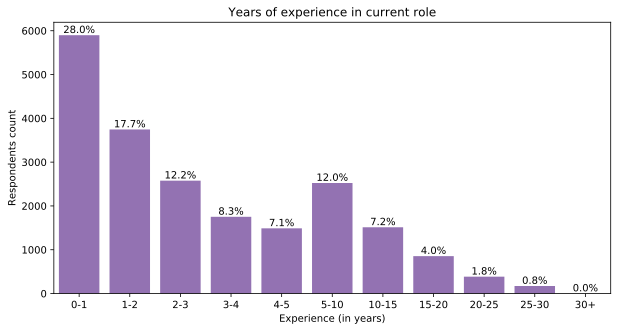

In [21]:
# Select the column for the corresponding question
exp_df = multiChoiceResp['Q8'][1:].dropna()

f,ax=plt.subplots(figsize=(10,5))

# Order in which we want the plot to ensure readability 
order= ['0-1', '1-2', '2-3', '3-4', '4-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30+']


# Do countplot 
ax=sns.countplot(exp_df,order=order, orient='v', color=color[4])

# Plot percentage on the bars
pct_on_bars(ax, exp_df, orientation='v', offset=50,adjustment=2)

    
plt.xlabel('Experience (in years)')
plt.ylabel('Respondents count')
plt.title('Years of experience in current role')
plt.show()

Given the fact that the maximum number of respondents are students, the first column doesn't give much of insight as in some way it was expected that the percentage of `0-1` years of experience would also be on a similar scale. In order to actually get better insights from this column, let us choose some top roles of interest and check the amount of experience people are having in those roles. 

[(Click here to go to the contents section at the top)](#contents)

<a id="roles-experience"></a>
## 4.9 Experience in top roles

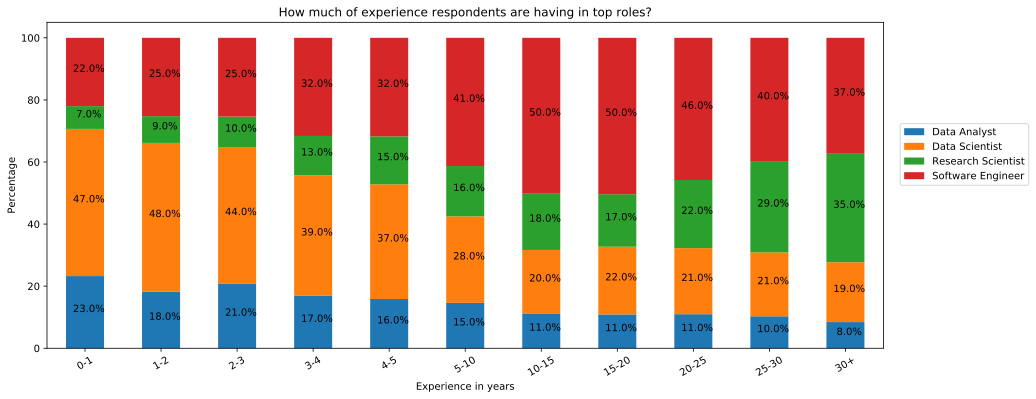

In [22]:
# Select the columns we are insterested in
df = multiChoiceResp[['Q6', 'Q8']][1:].dropna()

# Select top roles to consider
roles_to_consider = ['Data Scientist', 'Data Analyst', 'Software Engineer', 'Research Scientist'] 
                   
# Select only those rows that are of our interest
df = df[df['Q6'].isin(roles_to_consider)]

# Map the column values to numeric values because sorting the columsn then would become easy
col_dict = dict([(x,i)  for i,x in enumerate(order)])
df['Q8'] = df['Q8'].replace(col_dict)

# Group by roles and get the count for experience 
freq_df = df.groupby(['Q8'])['Q6'].value_counts().unstack()

# Convert the frequencies to percentage
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100

# Do a percentage plot
f,ax=plt.subplots(figsize=(15,6))
ax=pct_df.plot(kind='bar', stacked=True, ax=ax, rot=30, use_index=True);

# Use our handy dandy function to plot percentage on the stacked bars
pct_on_stacked_bars(axs=ax,orientation='v',values=pct_df.values)

# Map the xticks back to original column values 
ax.set_xticklabels(order)

plt.xlabel('Experience in years');
plt.ylabel('Percentage')
plt.title('How much of experience respondents are having in top roles?')
plt.legend(loc=(1.02,0.5))
plt.show()

**Note**: If you add up the percentages on the stacked bars, it might happen that the sum of percentages is either slightly lower/greater than 100. This is because of the **rounding error** of the float values and if you increase the precision, then everything will be fine except that visualization will be cluttered by the extra float values in text.

This is a much better plot than the previous one and we can extract a lot of information from this. 
* The percentage of **Data Analyst** decreases as the experience increases which is natural. Data Analyst is often considered an entry-level job in maximum cases, although this is not true for all cases. 
* A similar trend can be observed for **Data Scientists**. As the experience increases, people start to look for higher positions, for example, the position of a **Research Scientist**. We can clearly see that the percentage of Research Scientist increases as experience(in years) increases.

The only weird trend is about `Software Engineering`. As I said earlier too, a software engineer can be related to too many profiles. If you look at the bar corresponding to `5-10` years of experience, then it is clear that the percentage of software engineers increased and that of Data Scientists has decreased. Of course, some data scientists might have upgraded/switched to Research Scientist but would anyone switch from Data Scientist to Software engineer until unless the position involves Machine Learning/Deep Learning? Who knows!

[(Click here to go to the contents section at the top)](#contents)

<a id="salary"></a>
## 4.10 Yearly compensation

Q9. What is your current yearly compensation (approximate $USD)?

In [23]:
# Define a function to clean data and convert the salaries to desired type
def cleanup_salary(salary):
    '''The salaries are represented as 0-10,000 10-20,000...We will clean up this column 
       and convert the salary to numeric. Also for a range we will just take the upper value 
       as the representative salary. For example, if the salary in range 0-10,000 we will consider 
       the salary to be 10,000 as the representative. 
     '''
    
    # Replace the unwanted characters. PAY ATTENTION TO THE CHAINING
    salary = salary.str.replace(',', '').str.replace('+','')
    
    # Split the salaries on '-' and choose the last value
    # P.S: See the pandas usage here. This is the most elegant way to do such thigs in pandas
    salary = salary.str.split('-').str[-1]
    
    # Convert to numeric type
    salary = salary.astype(np.float64)
    
    return salary

Looking at the plain salary distribution won't give much of insight but there are two things which are more interesting to look into as compared to plain salary:
* Distribution of salary according to years of experience
* Distribution of salary according to the current role

You might be wondering if we can also include the `level of education` as another level to consider for salary distribution? It is very common that the salary of a person with a Doctoral degree/Master's degree is more than a person having only Bachelor's degree. There might be a few exceptions to this but this is how the trend is in general.

#### 4.10.1 Salary distribution w.r.t to years of experience

In [24]:
# Select the desired columns
salary_df = multiChoiceResp[['Q6', 'Q8', 'Q9']][1:].dropna()

# Remove all rows where the respondent declined to disclose the salary
salary_df = salary_df[~(salary_df['Q9']=='I do not wish to disclose my approximate yearly compensation')]

# Clean the salary column
salary_df['Q9'] = cleanup_salary(salary_df['Q9'])

# Order in which we want the plot to ensure readability 
order= ['0-1', '1-2', '2-3', '3-4', '4-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30+']

# A list to store box plot data for each category
salary_data= []

# Create a box plot trace
for exp in reversed(order):
    salary_data.append(go.Box(x=salary_df[salary_df['Q8'] == exp]['Q9'], name=exp, orientation='h'))

layout = go.Layout(title='Salary distribution w.r.t years of experience',
                   autosize=False,
                   height=500,
                   width=1000,
                   xaxis=dict(title='Salary'),
                   yaxis=dict(title='Experience(in years)',),)

fig = go.Figure(data=salary_data, layout=layout)
# Visualize
iplot(fig, show_link=False)

del salary_data

One interesting thing to note here is that the number of outliers is much more for the groups having lesser experience, for example, groups with `0-1` and `1-2` years of experience as compared to the groups with more than 10 years of experience. Pause reading this kernel for a moment and think of all the reasons that can be a potential driver for this thing. (I will provide my thoughts too but just write down all the things that you can think of as of now.)


#### 4.10.2 Salary distribution w.r.t to current role
We will consider only the top four roles only(discussed in the previous section). **There is no intention behind this selection except for brevity in plots.**

In [25]:
# Select only those data points that are of interest
salary_df = salary_df[salary_df['Q6'].isin(roles_to_consider)] # roles_to_consider is defined in previous section

# A list to store box plot data for each category
salary_data= []

# Create a box plot trace
for role in roles_to_consider:
    salary_data.append(go.Box(y=salary_df[salary_df['Q6']==role]['Q9'], name=role, orientation='v'))

layout = go.Layout(title='Salary distribution w.r.t current role',
                   xaxis=dict(title='Role'),
                   yaxis=dict(title='Salary',),)

fig = go.Figure(data=salary_data, layout=layout)
# Visualize
iplot(fig, show_link=False)

This is something really really interesting. 
* **Data Scientist** earn more than a **Research Scientist** in general. I suspect this is because of the fact that we didn't consider the 500K plus salaries in the data. 
* Analayze the plot for Data Analyst and Software engineer. Now you know why there are more outliers in the `0-1 and 1-2 years of experience` groups as compared to the more experienced groups.

[(Click here to go to the contents section at the top)](#contents)

<a id='business'></a>
## 4.11 Do businesses really want Machine Learning? 

Q10. Does your current employer incorporate machine learning methods into their business?

In [26]:
# Select the question 
bus_df = multiChoiceResp['Q10'][1:].dropna()

# Check percentage
bus_df_counts = round(bus_df.value_counts(normalize=True)*100)
bus_df_counts = bus_df_counts.to_dict()

for k,v in bus_df_counts.items():
    print(k.ljust(100), v,"%")

We are exploring ML methods (and may one day put a model into production)                            23.0 %
No (we do not use ML methods)                                                                        21.0 %
We recently started using ML methods (i.e., models in production for less than 2 years)              18.0 %
I do not know                                                                                        14.0 %
We have well established ML methods (i.e., models in production for more than 2 years)               13.0 %
We use ML methods for generating insights (but do not put working models into production)            10.0 %


(**Jaw dropped...literally!**) This is completely shocking, at least for me.
* Using ML in production -> 31%
* Either non-production ML or not using it at all -> 69%

WOW! How can it be? Only 30% of the business is running on ML. Why are the companies not leveraging machine learning?
* Is it because ML is an overkill for their work?
* Is it because they don't have enough data?
* Is it because they don't have the right people to work on it?
* Or is it something completely different?

[(Click here to go to the contents section at the top)](#contents)

<a id='proglang'></a>
## 4.12 Programming language preference

Q17. What specific programming language do you use most often?

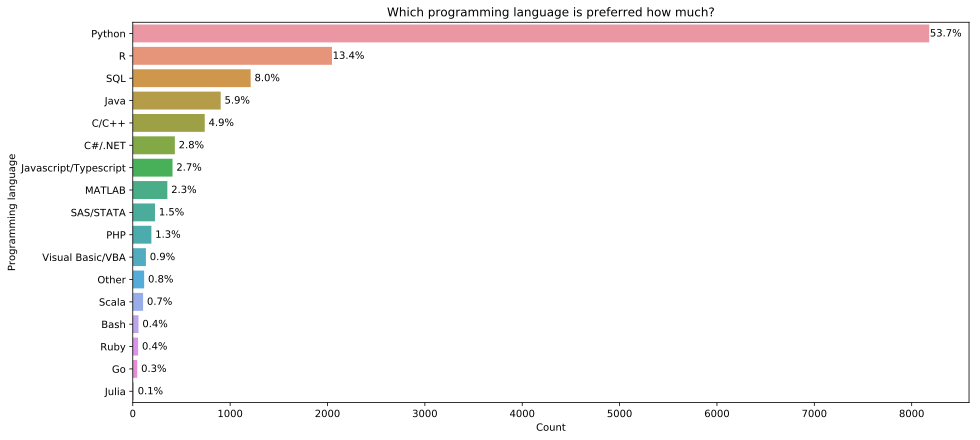

In [27]:
# Select the desired columns
prog_df = multiChoiceResp['Q17'][1:].dropna()
order = prog_df.value_counts().index

f,ax=plt.subplots(figsize=(15,7))

# Do countplot 
ax=sns.countplot(y=prog_df, orient='h', order=order)

# plot the percentage also
pct_on_bars(ax, prog_df, orientation='h', offset=170, adjustment=3)
    
plt.ylabel('Programming language')
plt.xlabel('Count')
plt.title('Which programming language is preferred how much?')
plt.show()

Ha! **Python** is taking over the world. Second place is secured by **R language** as usual, but the difference between the number of people using python and the number of people using R is quite high **(54% Vs 13%)**. The amount of flexibility python provides is literally awesome. One of the best things about Python is that it helps to save **developers time** to experiment with different things as everything is much easier to code in Python.

Most surprising is that **Julia** usage is almost 0%. I expected it to be bad but I didn't expect the count to be this bad. Last year we had a debate on Julia usage in our **[KaggleNoobs](https://kagglenoobs.herokuapp.com/)** slack and most of us agreed that if Julia keeps going at this rate, it would die a miserable death. 

Anyways let's look at what the people in top roles prefer most. We will consider top 4 roles and top 10 languages for visualization purpose. And I think that's all which matters actually in the real world too!

#### 4.12.1 Programming languages used by people in different roles

In [28]:
# Select the columns corresponding to current role(Q6) and programming language(Q17)
prog_df = multiChoiceResp[['Q6', 'Q17']][1:].dropna()

# Filter only top four roles and top 10 programming languages for brevity 
prog_df = prog_df[prog_df['Q6'].isin(roles_to_consider)]
prog_to_consider = prog_df['Q17'].value_counts().index[:10]
prog_df = prog_df[prog_df['Q17'].isin(prog_to_consider)]


#col_dict = dict([(x,i)  for i,x in enumerate(prog_to_consider)])
#prog_df['Q17'] = prog_df['Q17'].replace(col_dict)

# Group by roles and get the count for experience 
freq_df = prog_df.groupby(['Q17'])['Q6'].value_counts().unstack()

# Convert the frequencies to percentage
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100

# Get traces
data = get_traces(freq_df, pct_df, stacked=True, orientation='v', textposition='auto', opacity=0.7)

# Define the layout for plotly figure
layout = go.Layout(
     autosize=False,
     width=1000,
     height=600,
     barmode='stack',   
     margin=go.layout.Margin(
                            l=50,
                            r=0,
                            b=100,
                            t=50,),
    title='<b>Programming language preference in top roles</b>',
    xaxis=dict(title='Programming language'),
    yaxis=dict(title='Percentage'),
)

# Visualize
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

**Summary:**
* Data Analyst uses SQL, SAS/STATA and R more.
* For Data Scientist, Python and R are more favorable
* Research Scientist use MATLAB heavily. I know MATLAB is good and before python evolved, it was the only thing out there for researchers but I don't see any point in using MATLAB today. The world should switch to Python(3 not 2)
* Software Engineers use Java, Javascript, and PHP. 

[(Click here to go to the contents section at the top)](#contents)

<a id='advise'></a>
## 4.13 Which language should beginners learn first?

Q18. What programming language would you recommend an aspiring data scientist to learn first?

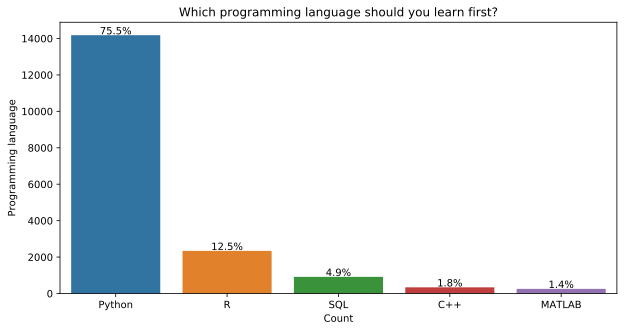

In [29]:
# Select the desired columns
prog_df = multiChoiceResp['Q18'][1:].dropna()

# Consider only top 5 languages
order = prog_df.value_counts().index[:5]

f,ax=plt.subplots(figsize=(10,5))

# Do countplot 
ax=sns.countplot(x=prog_df, order=order)

# Plot percentage on the bars
pct_on_bars(ax, prog_df, orientation='v', offset=50, adjustment=2)
    
plt.ylabel('Programming language')
plt.xlabel('Count')
plt.title('Which programming language should you learn first?')
plt.show()

Of course, you should learn **Python** first. But there is one thing that I really want to point out and make it clear as much as I can. Learning how to write **Python** code isn't a big deal but learning how to code in **Pythonic** way is a steep path and it can take quite some time to learn how to write efficient python code 

[(Click here to go to the contents section at the top)](#contents)

<a id="libraries"></a>
## 4.14 Most used ML libraries
Q20. Which ML library have you used the most?

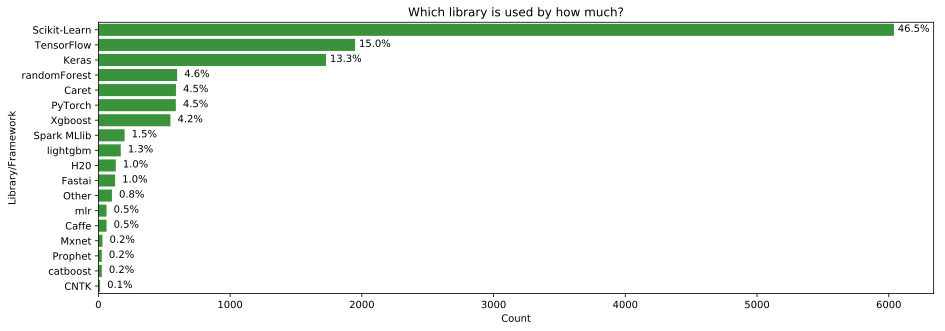

In [30]:
# Pick the data we are interested in
libraries_df = multiChoiceResp['Q20'][1:].dropna()

f,ax=plt.subplots(figsize=(15,5))

# Order in which we want the plot to ensure readability 
order= libraries_df.value_counts().index


# Do countplot 
ax=sns.countplot(y=libraries_df,order=order, orient='h', color=color[2])

# Plot percentage on the bars
pct_on_bars(ax, libraries_df, orientation='h', offset=150, adjustment=3)
    
plt.ylabel('Library/Framework')
plt.xlabel('Count')
plt.title('Which library is used by how much?')
plt.show()

**scikit-learn**: 46% of the respondents use scikit-learn. This shouldn't come as surprise. In fact, I expected it more. Even if you are not using scikit-learn for using any ML algorithm implementation, people still use it for doing five fold splits for validation, or the most basic train/test split, standardizing data, etc. Then there are algorithms like RandomForest in the library that is also used widely used.


**Tensorflow and Keras**: Keras has always been the easiest path(in most of the cases) if you want to build things quickly. Tensorlfow has always been a pain for simple tasks whereas for production usage, tensorflow still dominates the market. One important thing to observe is that the number of Tensorflow users has dropped from **24% in 2017** to **15% in 2018**. No surprise why it has dropped, PyTorch!.The ease and flexibility of doing things in **PyTorch** are much more as compared to Tensorflow.

* **A note to TF developers:** From the above stats, you should learn a lesson. A developers' responsibility is to build things in the way the end users want. What is important from your perspective may not be useful at all from an end users' perspective. Although with the ongoing `RFCs` for `TF2.0`, I expect things to improve, that doesn't mean that the developers should forget why someone switched from Keras/Tensorflow to PyTorch

**PyToch**: PyTorch is catching up quickly. Let's see how it performs next year once TF2.0 comes out

**Xgboost**: Xgboost has been one of the favorite libraries especially for almost all Kagglers. It is very powerful, easy to use and still unbeatable when it comes to tabular data.

[(Click here to go to the contents section at the top)](#contents)

<a id="vis"></a>
## 4.15 Popular Visualization libraries and tools

Q22. Which specific data visualization library or tool have you used the most?

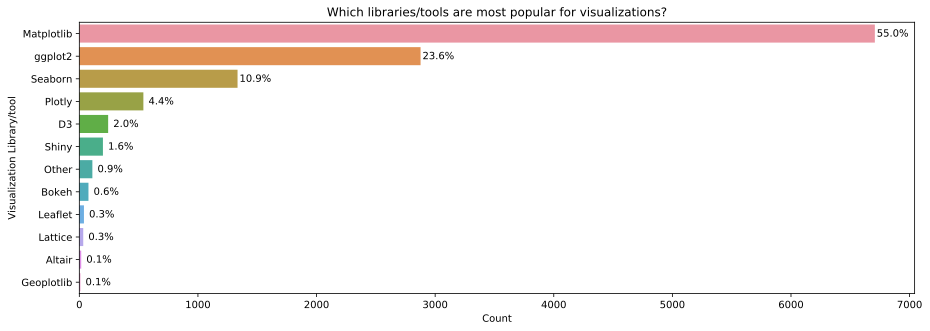

In [31]:
# Select the column corresponding to Q22
vis_df = multiChoiceResp['Q22'][1:].dropna()

f,ax=plt.subplots(figsize=(15,5))

# Order in which we want the plot to ensure readability 
order= vis_df.value_counts().index


# Do countplot 
ax=sns.countplot(y=vis_df,order=order)

# Plot percentage on the bars
pct_on_bars(ax, vis_df, orientation='h', offset=150, adjustment=3)
    
plt.ylabel('Visualization Library/tool')
plt.xlabel('Count')
plt.title('Which libraries/tools are most popular for visualizations?')
plt.show()

**Matplotlib** is the backbone of almost all the visualization libraries in Python. 55% of the respondents use matplotlib for visualization. The usage of Matplotlib is still dominant compared to other high-level libraries for graph objects in research papers. There is one thing that needs to be made crystal clear though. The respondent may not be using matplotlib directly for high-level objects but might be using it to tweak the basic graph objects. For example, in the above plot, I am not using matplotlib directly for creating the bar plot but I am using it to change the labels and title of the matplotlib figure object.

**ggplot2** ggplot is among those libraries that actually follow the `Grammar of Graphics` concept. It is neat and the visualizations created using it are always eye-catching.

**Seaborn** and **Plolty** are very useful high-level libraries for creating awesome visualizations. With plotly you can create some of the best interactive visualizations and if you look at the home page of that library, you will find that it supports multiple languages apart from Python. Seaborn is one of my favorite libraries when it comes to doing quick visualizations. With few lines of code, you can produce good visualizations. The only con with seaborn is that it doesn't support interactive visualization(**..yet**). 

Apart from them, **D3.js** is also very good in terms of flexibility and complex visualizations. **Altair** is another good interactive visualization library. The downside with Altair is that the documentation show its usage only with tiny and clean examples which are good but there is no documentation for dealing with complex and big datasets. If **[Jake](https://github.com/jakevdp)** can provide a tutorial(in a single jupyter notebook) with a dataset like this one or any other competition involving tabular data from Kaggle, I think Altair can be in top five within a few months. 

[(Click here to go to the contents section at the top)](#contents)

<a id="coding"></a>
## 4.16 How much data science people code actively?

Q23. Approximately what percent of your time at work or school is spent actively coding?

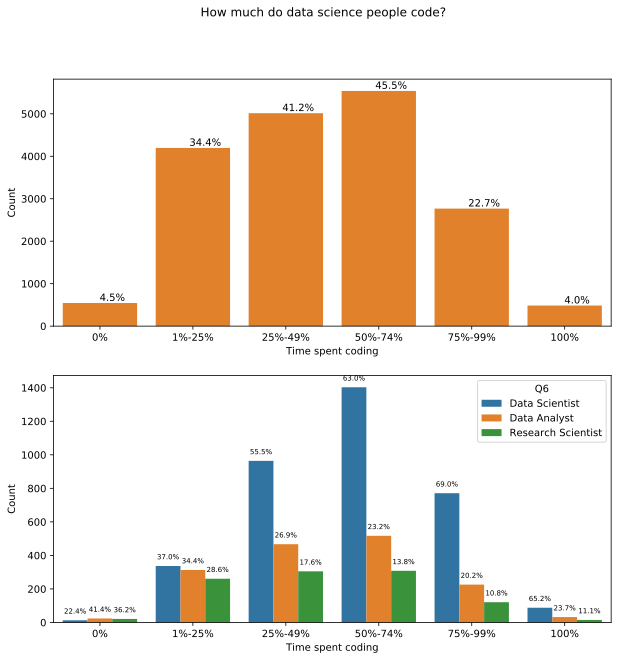

In [32]:
# Select all the columns that we are interested in
coding_df = multiChoiceResp[['Q6','Q23']][1:].dropna()

# Some cleanup
coding_df['Q23'] = coding_df['Q23'].str.replace("of my time", '').str.replace(" to ", '-').str.strip()

f,axes=plt.subplots(2,1, figsize=(10,10))

# Order in which we want the plot to ensure readability 
order= ['0%', '1%-25%', '25%-49%', '50%-74%', '75%-99%', '100%']


# Do countplot 
ax=sns.countplot(x='Q23', data=coding_df,order=order, color=color[1], ax=axes[0])

# Plot percentage on the bars
pct_on_bars(ax, vis_df, orientation='v', offset=50, adjustment=3)
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Time spent coding')

# Another interesting thing to do
roles = ['Data Scientist', 'Data Analyst', 'Research Scientist']
coding_df = coding_df[coding_df['Q6'].isin(roles)]
ax=sns.countplot(x='Q23', data=coding_df,order=order, ax=axes[1], hue='Q6')

# Get all the bars and plot the percentage also
bars = ax.patches
sections = len(bars)//3
first_bar = bars[:sections]
second_bar = bars[sections:len(first_bar)+sections]
third_bar = bars[len(second_bar)+sections:]

# Loop over the bars and put text on each bar
for left, middle, right in zip(first_bar, second_bar, third_bar):
        height_l = left.get_height()
        height_m = middle.get_height()
        height_r = right.get_height()
    
        
        if math.isnan(height_l):
            height_l=0
        if math.isnan(height_m):
            height_m=0
        if math.isnan(height_r):
            height_r=0
        
        total = height_l + height_m + height_r

        ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.1%}'.format(height_l/total), ha="center", fontsize=7)
        ax.text(middle.get_x() + middle.get_width()/2., height_m + 40, '{0:.1%}'.format(height_m/total), ha="center",fontsize=7)
        ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.1%}'.format(height_r/total), ha="center",fontsize=7)


axes[1].set_ylabel('Count')
axes[1].set_xlabel('Time spent coding')

plt.suptitle('How much do data science people code?')
plt.show()

Very interesting insights!

Only **45%** of the respondents spend 50-75% of their time in coding. Out of these,
* 63% of the respondents are data scientist
* 23% of the respondents are data analyst
* 13% of the respondents are research scientist

**40%** of the respondents spend 25-49% of their time in coding. Out of these,
* 55% of the respondents are data scientist
* 27% of the respondents are data analyst
* 18% of the respondents are research scientist

Overall, we can conclude that **Data Scientist** spend maximum time coding things while **Research Scientist** spend a minimum amount of time in coding. To be honest, this thing literally irritates me. When you become a Research Scientist, it doesn't mean you should stop coding and tell others to code something for you. I don't know what it is like in other countries but in India, if a person is Ph.D. and he is working with Data Science team, most of the time, he/she will be giving telling others what to experiment with. A Ph.D. in India hardly writes any code and most of the time they exploit the teammates for getting their things done.

Don't believe me? I will show you another plot right now to support my argument.

In [33]:
# In order to support my above argument, we will plot profiles and their education level
# Select rows from educational dataframe corresponding to the current indices
edu_level = edu_df[edu_df.index.isin(coding_df.index)]

# Create a new column
coding_df['Q4'] = edu_level.values

# Group by roles and get the count for experience 
freq_df = coding_df.groupby(['Q4'])['Q6'].value_counts().unstack()

# Convert the frequencies to percentage
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100

# Get traces
data = get_traces(freq_df, pct_df, stacked=True, orientation='h', textposition='outside', opacity=0.7)

# Define the layout for plotly figure
layout = go.Layout(
     autosize=False,
     width=1300,
     height=500,
     barmode='stack',   
     margin=go.layout.Margin(
                            l=400,
                            r=0,
                            b=100,
                            t=50,),
    title='How much do data science people code?',
    yaxis=dict(title='Level of Education'),
    xaxis=dict(title='Percentage'),
    
)

# Visualize
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

There you go. Did you see that? Most of the **Data Scientist** are having **Master's** or **Bachelor's** degree while most of the **Research Scientist** are having **Doctoral** degree. 

I am not saying all the research scientist are to be blamed and I am quite biased here because I have only seen the conditions in my country. The situation might be different in different countries. I would love to hear your views in the comments section

[(Click here to go to the contents section at the top)](#contents)

<a id="data-analysis"></a>

## 4.17 Writing code to do data analysis?

Q24. How long have you been writing code to analyze data?

In [34]:
# Selcting the columns of interest
eda_df = multiChoiceResp[['Q6', 'Q23', 'Q24']][1:].dropna()

# Get the value counts
eda_df_counts = eda_df['Q24'].value_counts()

# Perecntage values
eda_df_pct = (round(eda_df['Q24'].value_counts(normalize=True)*100,1)).values
eda_df_pct = [str(x)+'%' for x in eda_df_pct]

# Visualize
trace0 = go.Bar(
                y=eda_df_counts.values,
                x=eda_df_counts.index,
                orientation='v',
                text = eda_df_pct,
                textposition = 'outside',
                marker=dict(
                color='rgb(100,223,225)',
                line=dict(color='rgb(5,4,150)',width=2.0,
                         )),
                opacity=0.5
               )

layout = go.Layout(title='<b>How long have people been writing code to analyze data?</b>',
                  autosize=False,
                  width=800,
                  height=500,
                  margin=go.layout.Margin(
                                        l=50,
                                        r=200,
                                        b=200,
                                        t=50,),
                  yaxis=dict(title='Count'),
                
                )

fig = go.Figure(data=[trace0], 
                layout=layout)
iplot(fig, filename='eda_df-hover-bar', show_link=False)

Given the fact that Data Science became popular only in the last few years, it is obvious that most of the people spending time on data analysis would fall in the category `1-5 years`.

A more interesting thing to look at would be checking who among the top roles have been writing code for how long to analyze the datasets.

In [35]:
# Selecting only top profiles only
roles = ['Data Scientist', 'Data Analyst', 'Research Scientist']
years_to_consider = ['< 1 year', '1-2 years', '3-5 years', '5-10 years', '10-20 years']
eda_df = eda_df[eda_df['Q6'].isin(roles) & eda_df['Q24'].isin(years_to_consider)]

# Groupby and get the normalize counts
df = eda_df.groupby('Q24')['Q6'].value_counts().unstack()

# Reindex in the order we want
df = df.reindex(reversed(years_to_consider))

# Get the percentage values for each bar in each group on X-axis
freq_df = np.round(df.divide(df.sum(axis=0), axis=1)*100)

# Get traces
data = get_traces(df, freq_df, stacked=False, orientation='h', textposition='outside', opacity=0.6)

# Define the layout for plotly figure
layout = go.Layout(
    title='Who among DS,DA and RS have been writing code to analyze data for how long?',
    xaxis=dict(
        title='Count',
        titlefont=dict(
            family='Times New Roman',
            size=18
        )
    ),
    yaxis=dict(
        title='Years',
        titlefont=dict(
            family='Times New Roman',
            size=18,
            )
    )
)

# Visualize
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

**Note:** The percentage on the bars represents the percent of all the respondents of that particular category(DA/DS/RS). Plus DA is short for Data Analyst, DS for Data Scientist and RS for Research Scientist.

In any case, a data scientist has spent maximum time doing analysis. Of course, this will consist of all those Data Analysts also who got promoted to Data Scientist position but forget about it for now.

**The more you care about the data, the more you shine in data science**

[(Click here to go to the contents section at the top)](#contents)

<a id="ml_methods_hist"></a>
## 4.18 How much time people have spent on ML?
Q25. For how many years have you used machine learning methods (at work or in school)?

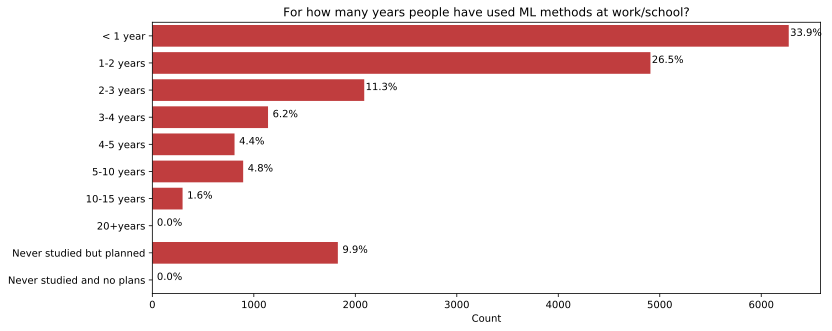

In [36]:
# Select the question column
ml_df = multiChoiceResp['Q25'][1:].dropna()

# Some cleansing
ml_df = ml_df.str.replace('I have never studied machine learning but plan to learn in the future', 
                          'Never studied but planned')
ml_df = ml_df.str.replace('I have never studied machine learning and I do not plan to', 
                          'Never studied and no plan')

# order in which we want to display the categoricals
order = ['< 1 year', '1-2 years', '2-3 years', '3-4 years', 
         '4-5 years', '5-10 years', '10-15 years', '20+years',
         'Never studied but planned', 'Never studied and no plans']

# visualize
f,ax=plt.subplots(figsize=(12,5))
ax=sns.countplot(y=ml_df,order=order, color=color[3])

# Plot percentage on the bars
pct_on_bars(ax, ml_df, orientation='h', offset=170, adjustment=2)
    
plt.ylabel('')
plt.xlabel('Count')
plt.title('For how many years people have used ML methods at work/school?')
plt.show()

[(Click here to go to the contents section at the top)](#contents)

<a id="dataScientist"></a>
## 4.19 Do people really think of themselves as data scientist?

Q26. Do you consider yourself to be a data scientist?

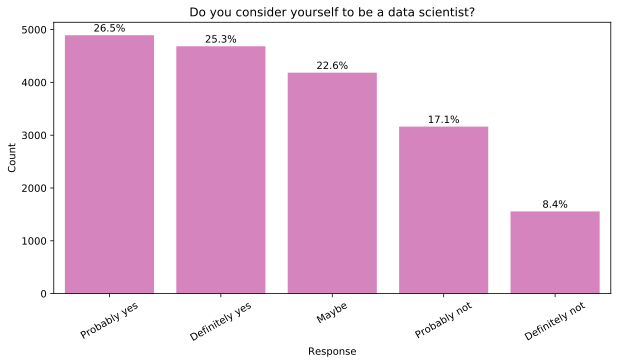

In [37]:
# Select the question column
ds_df = multiChoiceResp['Q26'][1:].dropna()

# Get the counts
ds_df_counts = ds_df.value_counts()

# visualize
f,ax=plt.subplots(figsize=(10,5))
ax=sns.countplot(x=ds_df, color=color[6], order=ds_df_counts.index)

# Plot percentage on the bars
pct_on_bars(ax, ds_df, orientation='v', offset=70, adjustment=2, prec=1)
    
plt.ylabel('Count')
plt.xlabel('Response')
plt.title('Do you consider yourself to be a data scientist?')
plt.xticks(rotation=30)
plt.show()

* **25%** of the respondents **definitely** consider themselves as data scientists.
* Almost **57%** of the respondents are not fully confident but with some probability consider themselves as data scientists. This represents both categories: **Probably yes** category as well as **Maybe** category.
* **17%** have a doubt on being considered as a data scientist while **8%** of the respondents are sure that they are not data scientists at all.

The above plot doesn't give us an idea about how many **true data scientist** are present in our dataset. Suppose a tech recruiter of some Muli-National Company(MNC for short) is also looking at this dataset in order to make sure that they are looking at the right country for hiring the right talent. How should the recruiter take a decision where to look for? Hence, we will divide the above plot among the top 5 countries(countries with the respondent count higher than the other countries)  

In [38]:
# Select the question column
ds_df = multiChoiceResp[['Q3', 'Q26']][1:].dropna()

# select top 5 countries
countries_to_consider = top10_countries[:5]

# Some cleansing
ds_df = ds_df[ds_df['Q3'].isin(countries_to_consider)]
ds_df['Q3'] = ds_df['Q3'].replace(['United States of America', 'United Kingdom of Great Britain and Northern Ireland'], 
                            ['USA', 'UK & Northern Ireland'])

# Groupby and get the counts
df = ds_df.groupby('Q26')['Q3'].value_counts().unstack()

# Get the percentage values for each bar in each group on X-axis
freq_df = np.round(df.divide(df.sum(axis=0), axis=1)*100)

# Get traces
data = get_traces(df, freq_df, stacked=False, orientation='v', textposition='outside', opacity=0.8)

# Define the layout for plotly figure
layout = go.Layout(
    title='<b>Do you consider yourself to be a Data Scientist?</b>',
    xaxis=dict(
        title='Response',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Count',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

# Visualize
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='data-scientist-in-top-countries', show_link=False)

*Beautiful plot, isn't it?*

**Note:** The percentage on the bars in the above plot shows how much percent of the total respondents from a country falls in this category. **It is not the percent of all the respondents (irrespective of the country) falling into a particular category**. For example, if there were 1000 respondents from US, out of those 1000 how many belongs to the different categories `Definietly not`, `Definitely yes`,etc.

* **Russia** tops the list in **Definitely yes** category with a whopping 35% followed by **USA(27%)** and **India(26%)**.
* Even if you consider the **Probably yes** category, **Russia** still tops the list followed by **China** and **United Kingdoms and Northern Ireland**.
* **China** and **India** are the places where the maximum number of **Maybe** cases are present.

[(Click here to go to the contents section at the top)](#contents)

Moving on, let's see what kind of data people are dealing with at work/school? What do you think? Given that most of the business is still running on tabular data, will `structured data` be at the top of the list, or with the hype that deep learning has created since past few years, is it going to be `unstructured data`? 

<a id="datasets-type"></a>
## 4.20 What types of data do people deal with?

Q32. What is the type of data that you currently interact with most often at work or school?

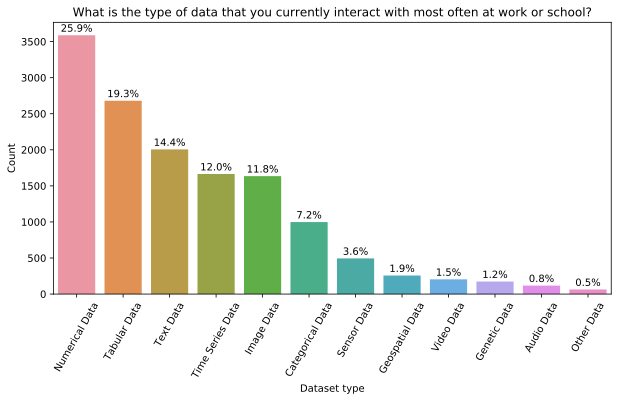

In [39]:
# Select the question column
dataset_df = multiChoiceResp['Q32'][1:].dropna()

# Get the counts
dataset_df_counts = dataset_df.value_counts()

# visualize
f,ax=plt.subplots(figsize=(10,5))
ax=sns.countplot(x=dataset_df, order=dataset_df_counts.index)

# Plot percentage on the bars
pct_on_bars(ax, dataset_df, orientation='v', offset=50, adjustment=2, prec=1)
    
plt.ylabel('Count')
plt.xlabel('Dataset type')
plt.title('What is the type of data that you currently interact with most often at work or school?')
plt.xticks(rotation=60)
plt.show()

* 26% of the people deal with numerical data. I expected it more because most of the people I see are dealing with numbers only.

* 20% of the data is tabular. This shouldn't come as a surprise as  huge amount of data is still stored in relational databases and in many companies, Excel is also prominent which is also tabular data.

* Time Series data is also an important type of dataset. Finance sector deals primarily with time series data. Apart from this, Image data and Text data are the datasets which people generally deal with most of the time. 

[(Click here to go to the contents section at the top)](#contents)

Data Science and Machine Learning are very fast moving fields. The number of papers that are uploaded to [arXiv](https://arxiv.org/) on a daily basis is crazy. It is no surprise that the last 5 years has been the `era of deep learning` and the amount of progress we have made there is incredible. 

In order to keep with the latest innovations and technologies, one needs to be an independent life-long learner. Learning is very very important, for personal as well as professional growth. The question is where do people spend most of their time learning these skills? Let's find out.

<a id="learningplatform"></a>
## 4.21 Learning platforms

Q37. On which online platform have you spent the most amount of time?

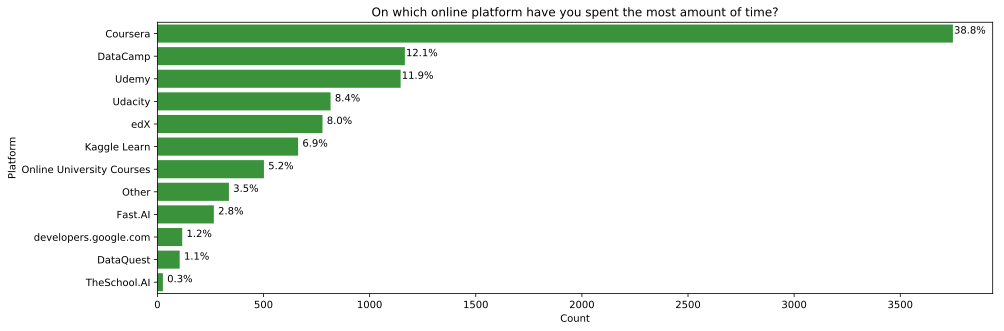

In [40]:
# Select the question column
platform_df = multiChoiceResp['Q37'][1:].dropna()

# Get the counts
platform_df_counts = platform_df.value_counts()

# visualize
f,ax=plt.subplots(figsize=(15,5))
ax=sns.countplot(y=platform_df, order=platform_df_counts.index, color=color[2])

# Plot percentage on the bars
pct_on_bars(ax, platform_df, orientation='h', offset=80, adjustment=2, prec=1)
    
plt.xlabel('Count')
plt.ylabel('Platform')
plt.title('On which online platform have you spent the most amount of time?')
plt.show()

**Summary:**

* **Coursera** is the most popular learning platform among the respondents. Given that Coursera has some of the best courses and all the courses are cheap (comparatively), it shouldn't be surprising. Also, if you consider Machine learning, Andrew Ng ML course on Coursera is still one of the best courses. It is one of those courses that is recommended to everyone starting in the field of ML.

* **DataCamp** is also cheap compared to others and has a wide variety of courses to learn from. Same goes for Udemy.
* **Udacity** is another great platform to learn from. It has some of the best courses, popularly known as Nanodegrees, designed by industry guys working on those things in production. But the fact that those Nanodegrees are very very expensive, the number of learners enrolled for these courses are expected to be small.
* **Kaggle learn** provides all the basic courses needed to get an overview of the baisc things and start Kaggling. 
* **FastAI** is great but currently it offers only two courses, one for Machine Learning and another for Deep Learning. Plus, I feel that the lectures are too long to concentrate on in a single go. 

[(Click here to go to the contents section at the top)](#contents)

Next question is a million dollar question. As we all know that Data Science is a vast field and gaining expertise in this field is no easy task at all. It is more complex and much broad than software engineering. In fact, software engineering is an aspect of it. I am not going to discuss that aspect here as it requires lengthy explanation (but we can do it in comments if you want to). 

So what makes you better at data science? Is it your academic achievements, independent projects or industrial experience? Let's find out.

<a id="expertise_DS"></a>
## 4.22 Expertise in Data Science

Q40. Which better demonstrates expertise in data science: academic achievements or independent projects?

In [41]:
# Selcting the columns of interest
expertise_df = multiChoiceResp[['Q4', 'Q40']][1:].dropna()

# Get the value counts
expertise_df_counts = expertise_df['Q40'].value_counts()

# Perecntage values
expertise_df_pct = (round(expertise_df['Q40'].value_counts(normalize=True)*100,1)).values
expertise_df_pct = [str(np.round(x).astype(int))+'%' for x in expertise_df_pct]

# Visualize
trace0 = go.Bar(
                x=expertise_df_counts.values,
                y=expertise_df_counts.index,
                orientation='h',
                text = expertise_df_pct,
                textposition = 'outside',
                marker=dict(
                color='rgb(300,100,25)',
                line=dict(color='rgb(5,4,150)',width=2,
                         )),
                opacity=0.6
               )

layout = go.Layout(title='<b>Which better demonstrates expertise in Data Science?</b>',
                  autosize=False,
                  width=900,
                  height=500,
                  margin=go.layout.Margin(
                                        l=450,
                                        r=0,
                                        b=100,
                                        t=100,),
                   xaxis=dict(title='Count')
                  )

fig = go.Figure(data=[trace0], 
                layout=layout)
iplot(fig, show_link=False)

Almost **86%** of the respondents believe that personal projects are more or equally important compared to academic achievements to gain expertise in Data Science. Personally, I also feel that independent projects are more important. I am not saying academia doesn't play an important role. It surely does but until unless you are developing something, academia knowledge can't take you to the next level. **Actual learning comes when you implement something that you learned in theory**.

Let us take this analysis to one more level deep. If 86% respondents think that independent projects are more/equally important as academia, it would be very interesting to know the level of education of these respondents and by the level of education, I mean the degree they hold. Let's plot that one as well.  

In [42]:
# We will consider only three levels of education here
edu_level_to_consider=["Doctoral degree", "Master’s degree", "Bachelor’s degree"]
expertise_df = expertise_df[expertise_df['Q4'].isin(edu_level_to_consider)]

# Groupby and get the value counts
df = expertise_df.groupby('Q40')['Q4'].value_counts().unstack()

# Get the percentage values for each bar in each group on X-axis
freq_df = np.round(df.divide(df.sum(axis=1), axis=0)*100)

# Get traces
data = get_traces(df, freq_df, stacked=False, orientation='h', textposition='outside', opacity=0.6)

# Define the layout for plotly figure
layout = go.Layout(
    title='Which better demonstrates expertise in Data Science?',
    xaxis=dict(title='Response'),
    margin=go.layout.Margin(
                            l=450,
                            r=0,
                            b=100,
                            t=50,),
    
)

# Visualize
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

**53%** of the respondents who consider independent projects equally important as academic, hold Master's degree while only **22%** of the respondents who are PhDs think the same.

Almost **50%** of the respondents who think independent projects are much more important, hold a Master's degree while only **12%** of them are PhD

**35%** of the respondents who think that independent projects are much less important, hold a PhD degree while only **48%** of them hold a Master's degree.


Another interesting thing to know is that how many respondents from a group with a certain level of education believes in what. For example, it is good to know that **22%** of the respondents who consider independent projects equally important hold a Doctoral degree. But what about the overall percentage of such respondents? Out of all the respondents having a Doctoral degree, how many of them believe that independent projects are equally important as academics?

Let's find out this percentage as well.

In [43]:
# Get the percentage values for each bar in each group on X-axis
freq_df = np.round(df.divide(df.sum(axis=0), axis=1)*100)

# Get traces
data = get_traces(df, freq_df, stacked=False, orientation='h', textposition='outside', opacity=0.6)

# Define the layout for plotly figure
layout = go.Layout(
    title='Which better demonstrates expertise in Data Science?',
    xaxis=dict(title='Response'),
    margin=go.layout.Margin(
                            l=450,
                            r=0,
                            b=100,
                            t=50,),
    
)

# Visualize
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

Now we can actually look at the plot and tell how much percentage of a group is lean to which opinion.

[(Click here to go to the contents section at the top)](#contents)



Anyways moving on, let us take a look on one of the most important questions in this survey. 

<a id="fairness"></a>
## 4.23 Do people care about bias in datasets/algorithms?

Q43. Approximately what percent of your data projects involved exploring unfair bias in the dataset and/or algorithm?

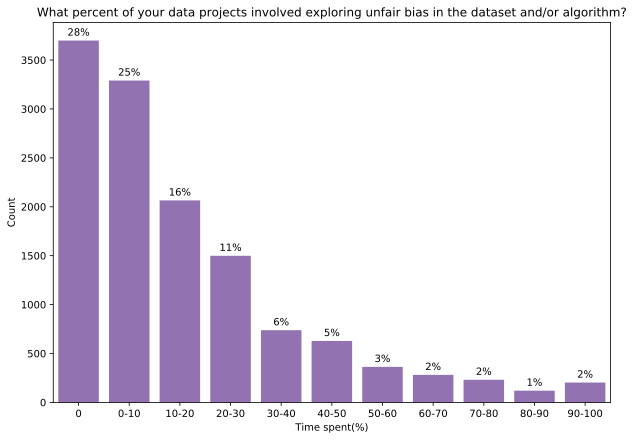

In [44]:
# Select the question column
bias_df = multiChoiceResp['Q43'][1:].dropna()

# Get the counts
bias_df_counts = bias_df.value_counts()

# visualize
f,ax=plt.subplots(figsize=(10,7))
ax=sns.countplot(x=bias_df, order=sorted(bias_df_counts.index), color=color[4])

# Plot percentage on the bars
pct_on_bars(ax, bias_df, orientation='v', offset=50, adjustment=2, prec=0)
    
plt.ylabel('Count')
plt.xlabel('Time spent(%)')
plt.title('What percent of your data projects involved exploring unfair bias in the dataset and/or algorithm?')
plt.show()

**~53%** of the respondents spend less than 10% of their time in investigating unfair bias in dataset or algorithm. This is certainly bad. I am not saying that you need to spend 50% or more time to analyze potential unfair bias but you should at least spend 20-30% of the time in analyzing all these things, especially when you are developing things for production. Bias in datasets is very common!

Most of the beginners/ novice machine learning engineers take the data and run different algorithms on it without giving much thought about the dataset or even about the algorithm. This is a bad practice and you should learn looking at your dataset carefully before making any assumption. Time spent here will be worth in the long run.

#### 4.22.1 Who among the DA,DS and RS spends how much time on finding bias?

In [45]:
# Select the question column
bias_df = multiChoiceResp[['Q6','Q43']][1:].dropna()

# We will consider only three roles here : Data Analyst, Data Scientist, Research Scientist
bias_df = bias_df[bias_df['Q6'].isin(roles)]

# Get the frequency counts for each category
freq_df = bias_df.groupby(['Q43'])['Q6'].value_counts().unstack()

# Get the percentages across each category for each role
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100

# Get traces
data = get_traces(freq_df, pct_df, stacked=True, orientation='v', textposition='auto', opacity=0.7)

# Define the layout for plotly figure
layout = go.Layout(
     autosize=False,
     width=900,
     height=500,
     barmode='stack',   
     margin=go.layout.Margin(
                            l=50,
                            r=0,
                            b=50,
                            t=50,),
    title='What % of your data projects involved exploring unfair bias in the dataset and/or algorithm?',
    xaxis=dict(title='Time(%)'),
    yaxis=dict(title='Percentage'),
)

# Visualize
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

I expected the Research Scientist to spend more time on finding bias as compared to other roles but to my surprise it isn't the case. 

[(Click here to go to the contents section at the top)](#contents)

<a id="modelinsights"></a>
## 4.24 Time spent exploring model insights

Q46. Approximately what percent of your data projects involve exploring model insights?

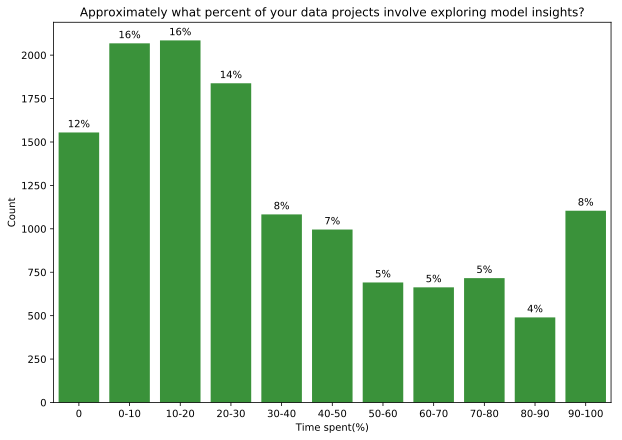

In [46]:
# Select the question column
model_insights_df = multiChoiceResp['Q46'][1:].dropna()

# Get the counts
model_insights_df_counts = model_insights_df.value_counts()

# visualize
f,ax=plt.subplots(figsize=(10,7))
ax=sns.countplot(x=model_insights_df, order=sorted(model_insights_df_counts.index), color=color[2])

# Plot percentage on the bars
pct_on_bars(ax, model_insights_df, orientation='v', offset=30, adjustment=2, prec=0)
    
plt.ylabel('Count')
plt.xlabel('Time spent(%)')
plt.title('Approximately what percent of your data projects involve exploring model insights?')
plt.show()

This is a tricky question. Exploring model insights is important for making progress in building better and efficient models but there is a catch. For example, It also depends on how much time does the project manager/company allows spending time on it. They want the same model to improve or rhey want 70 models and pick the best out of them? In any case, people should spend time exploring model insights. Also, I am not saying that you should dedicate 70-80% time on it but you should at least spend 20-25% of the time analyzing what is happening behind the scene

* **45%** of the respondents spend less than 30% of the time exploring model insights.
* Only **7%** of the respondents spend 50% of the time exploring model insights
* Almost **28%** of the respondents spend more than 50% of the time exploring model insights. 

[(Click here to go to the contents section at the top)](#contents)

<a id="explainableML"></a>
## 4.25 Are ML models black boxes?

Q48. Do you consider ML models to be "black boxes" with outputs that are difficult or impossible to explain?

I have heard many people saying that they don't want to apply machine learning to business because they don't know how to interpret the algorithms and how to explain the final outcome. A majority of them considers Machine Learning models as pure black box. 
Let's see what the respondents think about these machine learning models.

In [47]:
# Select the column of interest
df = multiChoiceResp['Q48'][1:].dropna()

# Get a frequency count
freq_counts = df.value_counts()

# Define a trace for the plotly pie chart
trace = go.Pie(labels=freq_counts.index, values=freq_counts.values,
               hoverinfo='label+value', 
               textfont=dict(size=20),
               marker=dict( line=dict(color='#000000', width=2)))

# Define a layout for the figure on which you are going to plot your data
layout = go.Layout(
            autosize=True,
            margin=go.layout.Margin(
                            l=10,
                            r=100,
                            b=10,
                            t=50,),
            legend=dict(
                x=1,
                y=1,
                traceorder='normal',
                font=dict(
                    family='sans-serif',
                    size=12,
                    color='#000'
                ),
                bgcolor='#E2E2E2',
                bordercolor='#FFFFFF',
                borderwidth=2
            )
)    

# Define the figure object
fig = go.Figure(data=[trace], layout=layout)

# Plot
iplot(fig, show_link=False)

**48%** of the respondents think that they understand the outputs of **many but not all** ML models and that they can explain it to someone else also. This is actually good. I expected this number to be low but surprisingly this is good. It is acceptable that not everyone understands every other ML model.

**12%** of the respondents treat ML models as **pure black box** while **22%** of them consider ML models **black boxes that can be interpreted by experts only**. This shows that we need to provide better courses, tutorials, etc. along with a good amount of mathematics, if not in depth so that people can get a better understanding of what a model is doing.

Only **9%** of the respondents can explain outputs of most of the ML models.


Let's check if we can find out how many respondents among `Data Analysts`, `Data Scientist` and `Research Scientist` consider ML models as black box. For this thing we need to make some changes to the data.

In order to simplify things, here are all the steps that we are gonna apply:
* Selct the columns corresponding to Q6(roles) and Q48(current one).
* Combine different categories in Q48 that we saw above into two groups: Black boxes and Not black boxes
* Select only DA,DS and RS as the roles in Q6
* Get the value counts after doing a groupby on roles
* Plot the values

In [48]:
def divide_categories(x):
    if x in ['I am confident that I can understand and explain the outputs of many but not all ML models',
            'I am confident that I can explain the outputs of most if not all ML models']:
        x = 'Not black boxes'
    else:
        x = 'Black boxes'
    return x

In [49]:
# Select the question column
df = multiChoiceResp[['Q6','Q48']][1:].dropna()

# We will consider only three roles here : Data Analyst, Data Scientist, Research Scientist
df = df[df['Q6'].isin(roles)]

# Drop the rows where people didn't provide opinion on explainable ML models
df = df[~df['Q48'].isin(['I do not know; I have no opinion on the matter'])]

# divide into two categories
df['Q48'] = df['Q48'].apply(divide_categories)

# Get the frequency counts for each category
freq_df = df.groupby(['Q6'])['Q48'].value_counts().unstack()

# Get the percentages across each category for each role
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100

# Get traces
data = get_traces(freq_df, pct_df, stacked=False, orientation='v', textposition='auto', opacity=0.8)

# Define the layout for plotly figure
layout = go.Layout(
     autosize=False,
     width=900,
     height=500,   
     margin=go.layout.Margin(
                            l=70,
                            r=0,
                            b=50,
                            t=50,),
    title='Do you consider ML models as black boxes?',
    xaxis=dict(title='Role'),
    yaxis=dict(title='Count'),
)

# Visualize
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

* **74%** of the Data Scientists and **66%** of the Research Scientists **don't consider ML models as black boxes**, which is great.

* **45%** of the Data Analysts consider ML models as **black boxes** which is somewhat expected. Given the fact that most of the time a Data Analyst is either wrangling the data or cleaning the data in order to find insights, a data analyst hardly deals with ML models actually.

[(Click here to go to the contents section at the top)](#contents)

Let's move to those parts of the survey where a single question was split into many parts

In [50]:
## Checking all the columns that are split into multiple parts
cols = multiChoiceResp.columns.tolist()
ques = set()
#cols = [x for x in cols if 'Part' in x]
for col in cols:
    col = col.split('_')[0]
    ques.add(col)
print("Number of questions split into different parts ", len(ques))

Number of questions split into different parts  51


<a id="ide"></a>
## 4.26 Which IDE do people prefer for their work?

In [51]:
# A handy danyd function to rename columns which are parts of a single question
def rename_columns(df, column_names, custom_name=None, index=None, exclude_others=True):
    column_names = column_names.apply(lambda x: x.split("-", 2)[-1]).tolist()
    column_names = [x.strip() for x in column_names]
    if custom_name:
        if index!= None:
            column_names[index] = custom_name
        else:
            return "Index value must be passed to use a custom name for a column"
    
    # Rename columns
    df.columns = column_names 
    
    # Whether to remove "None" and "Other" categories
    if exclude_others:
        columns_to_consider = [x for x in column_names if x not in ['None', 'Other']]
    else:
        columns_to_consider = column_names
    
    return columns_to_consider

In [52]:
# We will select the columns corresponding to roles and the question in which IDE pref was asked in the survey
df = multiChoiceResp[[x for x in cols if x=='Q6' or 'Q13_Part' in x]]

# Rename the columns and remove "None" and "Other"
column_names = df.iloc[0, :]
columns_to_consider = rename_columns(df, column_names, custom_name="Current Role", index=0, exclude_others=True)


df = df[columns_to_consider][1:] 

# Do a groupby on current role and get count for each column corresponding to each group
freq_df = df.groupby('Current Role')[columns_to_consider[1:]].count()
pct_df = np.round(freq_df.divide(freq_df.sum(axis=1), axis=0)*100)


# Sort the dataframe values
#pct_df.values.sort()

# values for annotations
pct_df_text = pct_df.applymap(lambda x: str(int(x)) + "%") 


# Define a annotated figure object
fig = ff.create_annotated_heatmap(z=pct_df.values.tolist(), 
                                  y=pct_df.index.tolist(), 
                                  x=pct_df.columns.tolist(), 
                                  annotation_text=pct_df_text.values.tolist(), 
                                  colorscale='Viridis')


# Define the layout for the fig created above
fig.layout.title = "Which IDE people prefer to work with?"
fig.layout.height = 800
fig.layout.width = 1000
fig.layout.margin.l = 200
fig.layout.margin.t = 150

# Visualize
iplot(fig,show_link=False)

It shouldn't come as a surprise that the most widely used IDE is `Jupyter/Ipython`. For each category the amount of usage of a particular IDE will be different, hence I plotted this heatmap, so that you look for a particular group and check what is the usage of each IDE in that group.

[(Click here to go to the contents section at the top)](#contents)

<a id="notebooks"></a>
## 4.27 Popular hosted notebooks

Q14. Which of the following hosted notebooks have you used at work or school in the last 5 years?

In [53]:
df = multiChoiceResp[[x for x in cols  if 'Q14_Part' in x]]

# Rename the columns and remove "None" and "Other"
column_names = df.iloc[0, :]
columns_to_consider = rename_columns(df, column_names, exclude_others=True)

# select only relevant columns
df = df[columns_to_consider][1:]

# Get the count and plot them
df = df.count().sort_values()

# Get percentages
pct = np.round(df.divide(df.sum())*100,2).values
pct = [str(x) + "%" for x in pct]


# Visualize
trace = go.Bar(
                x=df.values,
                y=df.index,
                orientation='h',
                text = pct,
                textposition = 'outside',
                marker=dict(
                color='rgb(100,225,25)',
                line=dict(color='rgb(5,4,150)',width=2,
                         )),
                opacity=0.6
               )

layout = go.Layout(title='<b>Popular hosted notebooks</b>',
                  autosize=False,
                  width=900,
                  height=500,
                  margin=go.layout.Margin(
                                        l=150,
                                        r=0,
                                        b=100,
                                        t=50,),
                   xaxis=dict(title='Count')
                  )

fig = go.Figure(data=[trace], layout=layout)
iplot(fig, show_link=False)

**Kaggle Kernels** are the most popular hosted notebooks. In fact, kaggle kernels are the best in class. They come up with pre-installed packages(almost all of them) and within minutes you can start working on the problem sets. One of the best things is that they come with GPU support as well. So, you don't have to worry about choosing the type of instances on cloud services for your use case. Just fire up a Kaggle kernel and you are good to go.

Apart from Kaggle Kernels, the other two platforms that are more famous are **JupyterHub/Binder** and **Google Colab**. No doubt, JupyterHub is a great tool, especially for collaboration purposes. **Colab** is a powerful and handy tool. You can directly access data from your drive, you can reference notebooks hosted on GitHub and open it up in Colab within a single click. Colab can be used by researchers to open source their code along with the papers. **Talk less, code more**. This step can help us handling the **reproducibility issues**. The downside with Colab is that the reading data from drive is very slow.

**Google Datalab** and **Azure Notebooks** share the same percentage of taste among the users while **Paperspace, Floydhub, Crestle** and **Domino Datalab** all are having a very small share among the users. Why? Maybe because of the limited functionalities...maybe!

[(Click here to go to the contents section at the top)](#contents)

<a id="datasetsfinder"></a>
## 4.28 Public Datasets

Q33. Where do you find public datasets?

In [54]:
df = multiChoiceResp[[x for x in cols  if 'Q33_Part' in x]]

# Rename the columns and remove "None" and "Other"
column_names = df.iloc[0, :]
columns_to_consider = rename_columns(df, column_names, exclude_others=True)

# select only relevant columns
df = df[columns_to_consider][1:]

# Get the count and plot them
df = df.count().sort_values()

# Define trace for plotly chart
trace = go.Pie(labels=df.index, values=df.values, showlegend=True)

# Layout of the fig
layout = go.Layout(title='Where do you find public datasets?',
        margin=go.layout.Margin(
                                l=10,
                                r=200,
                                b=10,
                                t=50,),
                legend=dict(
                    x=1,
                    y=1,
                    traceorder='normal',
                    font=dict(
                        family='sans-serif',
                        size=12,
                        color='#000'
                    ),
                    bgcolor='#E2E2E2',
                    bordercolor='#FFFFFF',
                    borderwidth=2
                )
    )

# Plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

* Data Aggregation platforms, like **Kaggle Datasets**, are the biggest source for finding public datasets.
* **Google Search** on the other hand, is the source for searching datasets for 15% of the respondents.
* **Google Dataset Search**, which was launched recently, is another good source for finding datasets. The good thing about Google Dataset Search platform is that you get all the details related to a dataset, like license info, author, etc. Since Kaggle is part of Google now, we can say that almost 30-35% of the respondents use these platforms for dataset search. Regarding the **Kaggle Datasets**, I would say this is the best place to start with. Why? You not only get the dataset, but you can also start a kernel from the Dataset page itself and start working on it privately/publicly within seconds.

[(Click here to go to the contents section at the top)](#contents)

<a id="timespentondiffaspects"></a>
## 4.29 Time spent on different stages in a Data Science project

Q34. During a typical data science project at work or school, approximately what proportion of your time is devoted to the following?

This is an important question. Although we all know that gathering and cleaning data are the two most consuming parts of any data science project, it will still be good to know how much time on an average people spend on each stage.<br> 
**Note**: There can be multiple ways to view this data and depends on what you are looking for. For example:
* You can take mean value for each stage to represent the time spent on that stage.
* Mean isn't a good measure when dealing with outliers. So, you can replace the mean with the median for each stage.
* For each respondent, get the percentage of time spent on each stage. Do this for all the respondents and then take the mean for each column correspondingly. 

In [55]:
df = multiChoiceResp[[x for x in cols  if 'Q34_Part' in x]]

# Rename the columns and remove "None" and "Other"
column_names = df.iloc[0, :]
columns_to_consider = rename_columns(df, column_names, exclude_others=False)

# select only relevant columns
df = df[columns_to_consider][1:].dropna().astype(np.float32)

# Get the median values for each column. The median value will be our representative value for that particular stage
mean_df = np.round(df.mean().sort_values(ascending=False))

# Get the phases and values(time spent) corresponding to each phase
values = mean_df.values.tolist()
phases = mean_df.index.tolist()

# Get the traces for plotly funnel chart
label_trace, value_trace, shapes = draw_funnel_chart(values, phases, colors=None, 
                                                     plot_width=50, section_d=10, section_h=70)


data = [label_trace, value_trace]

# Define layout
layout = go.Layout(
    title="Average time (%) spent on different stages in a typical Data Science project",
    titlefont=dict(
        size=15,
        color='rgb(203,203,203)'),
    margin=go.layout.Margin(l=50,
                            r=0,
                            b=10,
                            t=50,),
    shapes=shapes,
    height=500,
    width=1000,
    showlegend=False,
    hovermode='closest',
    paper_bgcolor='rgba(44,58,71,1)',
    plot_bgcolor='rgba(44,58,71,1)',
    xaxis=dict(
        showticklabels=False,
        zeroline=False,
    ),
    yaxis=dict(
        showticklabels=False,
        zeroline=False)
)
 
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

If we combine **gathering** and **cleaning** processes into a single stage, which is how we count it in the real world (the amount of time required to prepare the data from the process of gathering data to cleaning it for usage), then these two stages consumes almost **40%** of a typical data science project.

*Some of the labels aren't visible fully in the above funnel chart but you can hover over the labels to see them.*

[(Click here to go to the contents section at the top)](#contents)

<a id="databases"></a>
## 4.30 Popular Relational Databases

Q29. Which of the following relational database products have you used at work or school in the last 5 years? 

In [56]:
df = multiChoiceResp[[x for x in cols  if 'Q29_Part' in x]]

# Rename the columns and remove "None" and "Other"
column_names = df.iloc[0, :]
columns_to_consider = rename_columns(df, column_names, exclude_others=True)

# select only relevant columns
df = df[columns_to_consider][1:]

# Get the count and plot them
df = df.count().sort_values()

# Get percentages
pct = np.round(df.divide(df.sum())*100,2).values
pct = [str(x) + "%" for x in pct]


# Visualize
trace = go.Bar(
                x=df.values,
                y=df.index,
                orientation='h',
                text = pct,
                textposition = 'auto',
                marker=dict(
                color='rgb(35,35,65)',
                line=dict(color='rgb(0,0,0)',width=2,
                         )),
                opacity=0.6
               )

layout = go.Layout(title='Databases used by people over last 5 years',
                  autosize=True,
                  width=1500,
                  height=800,
                  margin=go.layout.Margin(
                                        l=200,
                                        r=0,
                                        b=100,
                                        t=50, pad=10),
                   xaxis=dict(title='Count'),
                  )

fig = go.Figure(data=[trace], layout=layout)
iplot(fig, show_link=False)

* No doubt that even today, **MySQL** is the most popular relational database. With a whopping 23% overall usage, MySQL is at the top position.
* **PostgresSQL** and **SQLite** are at the second and third position respectively. Anyone who has done web development, especially the backend, must have used either of these three once in their life.
* **Microsoft SQL server** is also good and I am surprised a little bit by the huge difference in the usage of MySQL and MS SQL server.

[(Click here to go to the contents section at the top)](#contents)


<a id="ml_products"></a>
## 4.31 What are all the machine learning products people have used?
    
Q19. Which of the following machine learning products have you used at work or school in the last 5 years? 

In [57]:
df = multiChoiceResp[[x for x in cols  if 'Q28_Part' in x]]

# Rename the columns and remove "None" and "Other"
column_names = df.iloc[0, :]
columns_to_consider = rename_columns(df, column_names, exclude_others=True)

# select only relevant columns
df = df[columns_to_consider][1:]

# Get the count and plot them
df = df.count().sort_values()

# Get percentages
pct = np.round(df.divide(df.sum())*100,2).values
pct = [str(x) + "%" for x in pct]


# Visualize
trace = go.Bar(
                x=df.values,
                y=df.index,
                orientation='h',
                text = pct,
                textposition = 'outside',
                marker=dict(
                color='rgb(10,20,225)',
                line=dict(color='rgb(0,0,0)',width=2,
                         )),
                opacity=0.6
               )

layout = go.Layout(title='Machine Learning Products',
                  autosize=False,
                  width=1500,
                  height=800,
                  margin=go.layout.Margin(
                                        l=300,
                                        r=0,
                                        b=10,
                                        t=50,
                                        pad=10),
                   xaxis=dict(title='Count'),
                  )

fig = go.Figure(data=[trace], layout=layout)
iplot(fig, show_link=False)

<a id="barriersreprod"></a>
## 4.32 Barriers in reproudcibility

Q50. What barriers prevent you from making your work even easier to reuse and reproduce?

In [58]:
df = multiChoiceResp[[x for x in cols  if 'Q50_Part' in x]]

# Rename the columns and remove "None" and "Other"
column_names = df.iloc[0, :]
columns_to_consider = rename_columns(df, column_names, exclude_others=True)

# select only relevant columns
df = df[columns_to_consider][1:]

# Get the count and plot them
df = df.count().sort_values()

# Define trace for plotly chart
trace = go.Pie(labels=df.index, 
               values=df.values, 
               showlegend=True,
               marker=dict(
                           line=dict(color='#000000', width=2))
              )

# Layout of the fig
layout = go.Layout(title='<b>What barriers prevent you from making your work even easier to reuse and reproduce?</b>',
                   margin=go.layout.Margin(
                                l=10,
                                r=200,
                                b=10,
                                t=100,),
                   legend=dict(
                                x=1,
                                y=1,
                                traceorder='normal',
                                borderwidth=5
                            )
                )

# Plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig, show_link=False)

**~33%** of the respondents think that reproducibility is **too time consuming**. I think this is a very lame excuse. If your work is important, how the world is going to believe you until unless your results are reproducible? Also, if you can't reproduce it, how is it different than just being **lucky**? I personally don't think that reproducibility is hard. If you make sure that you are taking care of things like `seed`, `rng` in your code, it is no big deal. I agree that the results can't be exactly the same but minute differences doesn't matter much (until unless it is SOTA). For example, in the real world, if a paper/code claims that they can achieve 90% accuracy with it and previous works were around 87-88%, even if I am getting 89% accuracy, I would be fine with it. Even 88.5% would work.

**~19** of the respondents say that they **don't get enough incentives to share their work**. I understand that when you are underpaid and still you do amazing work, it gets frustrating sharing your work. It feels like that you are throwing away your work for nothing. But not everything has to be related to money. **If you feel, you have done good work, go and say it out loud.**

**~14%** of the respondents think that reproducibility **requires too much of technical knowledge**. No, it doesn't require too much of technical knowledge but it requires you to know about all the things that could have biased your results. **Validation isn't just science, it's an art**.

**10%** of the respondents are afraid that **others will use their work without giving proper credits**. *This one is a legitimate concern.* Almost all the time people talk about reproducibility but I have hardly seen anyone discussing acknowledgement. This is a reflection of your bad character as a data science person. **Acknowledging someone's work doesn't make you less capable, rather it shows that you respect the great work done by others**


[(Click here to go to the contents section at the top)](#contents)

<a id="conclusion"></a>
## 4.33 Conclusion

That's all folks! I think we have analyzed all the important questions asked in this survey. I will conclude the main points here that we already discussed and analyzed in detail in the notebook:

* Number of women working in Data Science has increased in 2018 but the growth is slow and we need to do more to remove the gender bias from this niche field.
* Gender distribution in younger age-group is more pronounced and we need to address this before things get bad again.
* Each country has the gender bias problem and the ratio is screwed in each and every country.
* Number of respondents interested in getting Masters' degree has increased since 2017. 
* Most of the businesses have just started to explore Machine Learning and only a handful of them have deployed Machine Learning in production.
* Python is the topmost preferred language for doing data science and machine learning and it is the most recommended one as well.
* In terms of ML libraries, scikit-learn, Tensorflow, Keras, Xgboost and PyTorch are dominating over others
* Russia is the country where most of the respondents are confident about considering themselves as a data scientist.
* Numerical data, text data, tabular data, time-series data and image data are the kind of datasets most of the people deal with.
* Coursera is the most popular online learning platform among the respondents.
* Most of the people spend less than 10% of their project time in finding bias in dataset/algorithm. This is a bad habit and we need to teach people the importance of it.
* More than 50% of the respondents believe that ML models aren't black boxes and their outputs can be interpreted.
* Jupyter is the most popular IDE among all the respondents.
* Kaggle Kernels are the most popular hosted notebooks.
* Kaggle Datasets, Google Search and Google Dataset Search are the best sources to search for any kind of dataset.
* Gathering, cleaning and visualizing data are the most expensive stages of a data science project.
* Tabular databases like MySQL, PostgresSQL, etc dominate the database market.
* A large group of respondents think that reproducibility is too time-consuming while others think that it requires too much of knowledge. Not giving proper credits to someone's work is another factor which drives people away from reproducibility.


We, as a data science community, are responsible(directly or indirectly) for all the things that are happening in this field and only we have the power to make things right. It is acceptable that not everyone can bring a big change but you can always raise your voice against wrong things. 


I hope you enjoyed the analysis and might have learnt something new about all the libraries I have used. There is a lot of code in there and if you find any mistake in it or if you have any suggestion/feedback, please do let me know in the comments section. **Happy Kaggling!**